# Paso 1: Carga de datos y revision general

In [1]:
#Inicializacion
#Carga de las librerias
#Analisis de Datos
import pandas as pd 
#Trabajar con matrices multidimensionales, realizando cálculos matemáticos y lógicos. 
import numpy as np 
#modulo de estadisticas de la biblioteca scipy
from scipy import stats as st 
#Utilizar la funcion factorial 
from math import factorial 
#Utilizar graficos
import seaborn as sns
#Para graficar
import matplotlib.pyplot as plt

In [2]:
#Visualizar toda la informacion del DF
pd.set_option('display.max_columns', None)
pd.reset_option('display.*') 

In [3]:
#Carga del DataFrame
games = pd.read_csv('/datasets/games.csv')

In [4]:
#Preparacion de los datos
games.info()
print()
display(games.head(15))
print()
#games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# Paso 2: Preparacion de los datos

In [5]:
#Mejora de los nombres de las columnas
#quitar espacios, trabajar todo en minusculas y asignar los nuevos valores a las columnas

print(f'Before Changes: {games.columns}')
print()
new_col_names = []

for old_name in games.columns:
    name_stripped = old_name.strip() #Eliminar espacios, al principio y final
    name_lowered = name_stripped.lower() #Convertir a minusculas
    name_no_spaces= name_lowered.replace(' ', '_') #Eliminar espacios vacios, por quiones bajos
    new_col_names .append(name_no_spaces) #Se agrega al a nueva lista 

#Asignar los nuevos valores de las columnas
games.columns = new_col_names

print(f'After Changes: {games.columns}')

#Revisar los cambios de los nombres de las columnas
display(games.head(5))
    


Before Changes: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

After Changes: Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
#Antes de seguir con el analisis, se verificara si los Dtype de las columnas es adecuada 
# para cada una
#Verificar igualmente la informacion nula que contienen

#Verificar valores unicos de columnas
# Ver algunos valores únicos de user_score
print("Valores únicos de user_score")
print(games['user_score'].unique())

Valores únicos de user_score
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [ ]:
#Antes de realizar cualquier cambio en los Dtypes de las columnas, identificare la informacion que corresponde a los datos de tipo NAN y TBD para user_score
print(games[games['user_score'] == 'nan'])
print()
#Verificar valones nulos
print(games[games['user_score'].isna()])


Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA 

##
Con base en el analisis previo de la informacion en especifico para user_score. Se identifico lo siguiente: 6701 valores NAN

1.Juegos sin ventas:
* Algunos juegos con user_score NaN efectivamente tienen ventas de 0 en todas las regiones,
lo cual tiene mucho sentido - si no se vendió, probablemente no hay reseñas de usuarios.

2.Juegos con ventas pero sin scores:
* Pero también hay juegos que SÍ tuvieron ventas pero
no tienen ni user_score ni critic_score. 

Este analisis, podria incluso tomarse a una situacion similar para los puntajes de critic_score, pero por el momento, se seguira el analisis de la columna user_score.

In [8]:
print(games[games['user_score'] == 'tbd'])
print((games[games['user_score'] == 'tbd']).describe())

                                           name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score 

## Patrón de los valores 
'tbd': 2424 valores
Todos los juegos con user_score = 'tbd' tienen jp_sales = 0.0. 

Esto sugiere que 'tbd' (to be determined) podría estar relacionado con juegos que no se lanzaron
o no tuvieron ventas en el mercado japonés.

Esto revela que los valores faltantes no son aleatorios, sino que siguen patrones específicos:

* NaN: Mezcla de juegos sin ventas y juegos con ventas pero sin reseñas (6701 valores con NAN)
* 'tbd': Específicamente juegos sin ventas en Japón(2424 valores con tbd)

## Justificación para la Limpieza de user_score

### Problema Identificado:
La columna `user_score` contiene dos tipos de valores faltantes:
- **NaN (6,701 valores)**: Mezcla de juegos sin ventas y juegos con ventas pero sin reseñas de usuarios
- **'tbd' (2,424 valores)**: Todos corresponden a juegos con jp_sales = 0.0 (sin ventas en Japón)

### Decisión de Limpieza:
**Unificaremos ambos tipos como NaN** por las siguientes razones:

1. **Consistencia**: Ambos representan "ausencia de información de usuarios"
2. **Análisis futuro**: Distinguir entre "sin reseñas" (NaN) vs "reseñas muy malas" (valores bajos como 1-3)
3. **Flexibilidad**: 
    Mantener NaN nos permite:
       - Usar otros indicadores (ventas, critic_score) para evaluar éxito
       - Aplicar diferentes estrategias según el contexto del análisis
       - Evitar sesgo al no asumir que "sin reseñas" = "malo"

### Enfoque para Definir Éxito:
Dependiendo del caso, podremos considerar exitoso un juego basado en:
    - **Buenas ventas Y buenas reseñas** (cuando ambas estén disponibles)
    - **Solo buenas ventas** (cuando no hay reseñas de usuarios)
    - **Critic_score** como indicador alternativo de calidad


In [9]:
# Limpieza de user_score: Unificar valores faltantes y convertir a numérico
print("Antes de la limpieza:")
print(f"Valores 'tbd': {(games['user_score'] == 'tbd').sum()}")
print()

Antes de la limpieza:
Valores 'tbd': 2424



In [10]:
# Paso 1: Convertir 'tbd' a NaN para unificar valores faltantes
games['user_score'] = games['user_score'].replace('tbd', np.nan)

# Paso 2: Convertir a numéricode object a float64
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

print("Después de la limpieza:")
print(f"Total valores NaN: {games['user_score'].isna().sum()}")
print(f"Tipo de dato: {games['user_score'].dtype}")
print()

# Verificar el rango de valores
print("Estadísticas de user_score:")
print(games['user_score'].describe())

Después de la limpieza:
Total valores NaN: 9125
Tipo de dato: float64

Estadísticas de user_score:
count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


In [11]:
#Verificamos que se haya realizado el cambio de DTYPE de la columa user?score
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [12]:
#Análisis de Valores Faltantes por Columna
#year_of_release
#Valores unicos
print('Cantidad de valores unicos:\n', games['year_of_release'].nunique())
print()
print('Años unicos en el dataset:\n', games['year_of_release'].unique())
print()
#Verificar valores nulos
display('Valores nulos en year_of_release:\n', games[games['year_of_release'].isna()])
print()


Cantidad de valores unicos:
 37

Años unicos en el dataset:
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]



'Valores nulos en year_of_release:\n'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# Análisis de year_of_release
print(f"Total de juegos: {len(games)}")
print(f"Porcentaje faltante: {games['year_of_release'].isna().sum()/len(games)*100:.2f}%")
print()

# Ver ejemplos de juegos sin año
print("Ejemplos de juegos sin year_of_release:")
missing_year = games[games['year_of_release'].isna()]
print(missing_year[['name', 'platform','year_of_release', 'genre', 'na_sales', 'eu_sales','jp_sales']].head(10))
print()

# contabilizarl as paltaformas sin año de lanzamiento
print("Distribución por plataforma (juegos sin year_of_release):")
print(missing_year['platform'].value_counts().head(10))
print()

# contabilizar el genero sin año de lanzamiento
print("Distribución por Genero (juegos sin year_of_release):")
print(missing_year['genre'].value_counts().head(10))

Total de juegos: 16715
Porcentaje faltante: 1.61%

Ejemplos de juegos sin year_of_release:
                                            name platform  year_of_release  \
183                              Madden NFL 2004      PS2              NaN   
377                             FIFA Soccer 2004      PS2              NaN   
456                   LEGO Batman: The Videogame      Wii              NaN   
475                   wwe Smackdown vs. Raw 2006      PS2              NaN   
609                               Space Invaders     2600              NaN   
627                                    Rock Band     X360              NaN   
657     Frogger's Adventures: Temple of the Frog      GBA              NaN   
678  LEGO Indiana Jones: The Original Adventures      Wii              NaN   
719                               Call of Duty 3      Wii              NaN   
805                                    Rock Band      Wii              NaN   

         genre  na_sales  eu_sales  jp_sales  
183

## Justificación para la Limpieza de year_of_release (269 valores faltantes)

### Problema Identificado:

La columna `year_of_release` contiene:
- **NaN (269 valores)**: Mezcla de juegos conmuy pocas ventas en EU y sin ventas en  Japon.
- **Las plataformas que predominan son Nintendo y Sony (TOP 3) con el genero de Accion.

Esta cantidad de datos 269 representa el 1.6% del conjunto total de datos (16715)

### Decisión de Limpieza:
** Los datos se quedaran como tipo NaN** por las siguientes razones:

1. ** Por tema de seguridad**: Pandas excluira estos valores de los analisis temporales
2. **claridad**: estos valores, al momento de hacer graficos no apareceran como sesgos ni distorcioanran los resultados
3. **Flexibilidad**: Los datos no seran excluidos de analisis proximos.

### Distribución por plataforma:
* Wii y PS2 lideran con 34 juegos cada una sin año de lanzamiento
* Plataformas diversas: Los valores faltantes se distribuyen entre 10 plataformas diferentes

**Ninguna plataforma domina completamente los valores faltantes**

### Distribución por género:

* Action domina con 62 juegos (23% de los valores faltantes)
* Sports le sigue con 42 juegos

** Los valores faltantes abarcan múltiples géneros**


In [14]:
#Analisis de los valores faltantes por columna
#name
#Valores unicos
print('Cantidad de nombres unicos:\n', games['name'].nunique())
print()
print('Nombres unicos en el dataset:\n', games['name'].unique())
print()
#Verificar valores nulos
display('Valores nulos en name:\n', games[games['name'].isna()])
print()

Cantidad de nombres unicos:
 11559

Nombres unicos en el dataset:
 ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']



'Valores nulos en name:\n'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


## Justificación para la Limpieza de name (2 valores faltantes)

Registro 659:
- Sin nombre, sin género
- Ventas mínimas: NA=1.78, EU=0.53, JP=0.00, Other=0.08
- Todos los scores son NaN

Registro 14244:
- Sin nombre, sin género  
- Ventas casi nulas: NA=0.00, EU=0.00, JP=0.03, Other=0.00
- Todos los scores son NaN

### Problema Identificado:
* Datos incompletos críticos: Sin nombre ni género, no se puede identificar el juego
* Ventas sin valores: No aportan valor al análisis de patrones de éxito
* Información faltante múltiple: Faltan datos en varias columnas importantes
* Impacto mínimo: Solo 2 registros de 16,715 (0.01%)


In [15]:
# Eliminar registros sin nombre
print(f"Registros Antes de eliminar name faltantes: {len(games)}")

Registros Antes de eliminar name faltantes: 16715


In [16]:
#Eliminar registros sin nombre
games = games.dropna(subset=['name'])
print(f"Registros después de eliminar name faltantes: {len(games)}")

Registros después de eliminar name faltantes: 16713


In [17]:
#Verificcion del total de filas , posterior a eliminar name==null
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
#Analisis de valores faltantes en columnas
#genre
#Valores unicos
print('Cantidad de generos unicos:\n', games['genre'].nunique())
print()
print('Generos unicos en el dataset:\n', games['genre'].unique())
print()
#Verificar valores nulos
display('Valores nulos en genero:\n', games[games['genre'].isna()])
print()

Cantidad de generos unicos:
 12

Generos unicos en el dataset:
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']



'Valores nulos en genero:\n'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


## Justificación para la Limpieza de genre 

No contamos con valores nulos en la columna genre

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [20]:
#Analissi de valores faltantes por columna
#critic score
#Valores unicos
print('Cantidad de valores unicos:\n', games['critic_score'].nunique())
print()
print('Valores unicos en el dataset:\n', games['critic_score'].unique())
print()
#Verificar valores nulos
print('Valores nulos en critic_score:\n', games['critic_score'].isna().sum())
print()
display('Valores nulos en critic_score:\n', games[games['critic_score'].isna()])
print()

Cantidad de valores unicos:
 82

Valores unicos en el dataset:
 [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

Valores nulos en critic_score:
 8576



'Valores nulos en critic_score:\n'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
# Ver ejemplos de juegos sin año
print("Ejemplos de juegos sin critic_score:")
missing_critic_score = games[games['critic_score'].isna()]
display(missing_critic_score[['name', 'platform','year_of_release', 'genre', 'na_sales', 'eu_sales','jp_sales']].head(10))
print()

# contabilizarl as paltaformas sin critic score
print("Distribución por plataforma (juegos sin critic_score):")
print(missing_critic_score['platform'].value_counts().head(10))
print()

# contabilizar el genero sin critic score
print("Distribución por Genero (juegos sin critic_score):")
print(missing_critic_score['genre'].value_counts().head(10))
print()

#Año minimo de lanzamiento
print("Año mínimo de lanzamiento:")
print(missing_critic_score['year_of_release'].min())

#Año maximo de lanzamiento
print("Año mínimo de lanzamiento:")
print(missing_critic_score['year_of_release'].max())

Ejemplos de juegos sin critic_score:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84



Distribución por plataforma (juegos sin critic_score):
DS      1434
PS       997
PS2      863
PSP      747
Wii      735
PS3      511
GBA      384
3DS      352
X360     346
N64      319
Name: platform, dtype: int64

Distribución por Genero (juegos sin critic_score):
Action          1479
Misc            1227
Sports          1154
Adventure        980
Role-Playing     761
Simulation       521
Racing           507
Fighting         440
Platform         391
Strategy         381
Name: genre, dtype: int64

Año mínimo de lanzamiento:
1980.0
Año mínimo de lanzamiento:
2016.0


In [22]:
#Verificar juegos antes y despues del año 2000.
pre_2000 = missing_critic_score[missing_critic_score['year_of_release'] < 2000]
post_2000 = missing_critic_score[missing_critic_score['year_of_release'] >= 2000]

print("Juegos antes del 2000 con critic_score = nan: ")
print(len(pre_2000))
print(f"Porcentaje pre-2000: {len(pre_2000)/len(missing_critic_score)*100:.1f}%")
display(pre_2000)
print()
print("Juegos despues del 2000 con critic_score = nan: ")
print(len(post_2000))
print(f"Porcentaje post-2000: {len(post_2000)/len(missing_critic_score)*100:.1f}%")
print(post_2000['critic_score'].isna().sum())
display(post_2000)


Juegos antes del 2000 con critic_score = nan: 
1878
Porcentaje pre-2000: 21.9%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16539,Grand Prix Legends,PC,1997.0,Racing,0.00,0.01,0.00,0.00,NaN,7.5,E
16607,Samurai Shodown: Warrios Rage,PS,1999.0,Fighting,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16666,Psychic Detective,PS,1995.0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A



Juegos despues del 2000 con critic_score = nan: 
6583
Porcentaje post-2000: 76.8%
6583


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Justificación para la Limpieza de critic_score (8,576 valores faltantes - 51.3%)

# Análisis de Patrones Identificados:
1. Rango Temporal (1980-2016):
* En 1980 NO existían sistemas organizados de reseñas profesionales
    * Los sitios como IGN, GameSpot, Metacritic surgieron en los años 90s-2000s
    * 76.8% de los juegos son post-2000
    * 21.9% de los juegos son pre-200
* Justificación histórica: Los juegos más antiguos naturalmente carecen de estas puntuaciones

2. Nintendo DS Domina los Valores Faltantes:
* 1,434 juegos de DS sin critic_score (16.7% del total de faltantes)
* Razón lógica: DS tenía muchos juegos casuales/nicho que no recibían cobertura profesional
    * Muchos juegos de DS eran títulos menores o regionales

3. Género Action Lidera:
* 1,479 juegos de Action sin critic_score
* Paradoja aparente: Action suele ser popular, pero muchos pueden ser juegos menores

# Hallazgo clave: 
Muchos juegos exitosos comercialmente NO tienen critic_score, lo que confirma que:
* La ausencia NO indica baja calidad
* Las ventas pueden ser un indicador independiente de éxito
* Los valores faltantes siguen patrones específicos, no son aleatorios

# Decisión de Limpieza:
Mantener los valores como NaN por las siguientes razones:
* Justificación histórica: Los juegos pre-2000 naturalmente carecen de reseñas profesionales
* Patrones no aleatorios: Los faltantes siguen lógica específica (plataforma, época, tipo de juego)
* Flexibilidad analítica: Permite usar otros indicadores (ventas, user_score) para evaluar éxito
* Preservación de información: No asumimos que "sin reseñas" = "malo"

In [23]:
#Analisis de valores faltantes en columnas
#rating
#Valores unicos
print('Cantidad de rating unicos:\n', games['rating'].nunique())
print()
print('Rating unicos en el dataset:\n', games['rating'].unique())
print()
#Verificar valores nulos

# Ver ejemplos de juegos sin rating
print("Ejemplos de juegos sin rating:")
missing_rating = games[games['rating'].isna()]
display(missing_rating.head(10))
print()

# Distribución por plataforma sin rating
print("Distribución por plataforma (juegos sin rating):")
print(missing_rating['platform'].value_counts().head(10))
print()

# Distribución por género sin rating
print("Distribución por Genero (juegos sin rating):")
print(missing_rating['genre'].value_counts().head(10))


Cantidad de rating unicos:
 8

Rating unicos en el dataset:
 ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

Ejemplos de juegos sin rating:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN



Distribución por plataforma (juegos sin rating):
PS     989
DS     878
PS2    680
PSP    665
PS3    379
N64    319
Wii    318
GBA    300
3DS    292
PSV    279
Name: platform, dtype: int64

Distribución por Genero (juegos sin rating):
Action          1181
Misc             868
Adventure        857
Sports           839
Role-Playing     721
Fighting         411
Racing           377
Strategy         344
Platform         319
Simulation       305
Name: genre, dtype: int64


## Categorías ESRB actuales:

* E (Everyone) - Para Todos
* E10+ (Everyone 10+) - Para Todos 10+
* T (Teen) - Adolescente
* M (Mature) - Maduro
* AO (Adults Only) - Sólo para Adultos

## Categorías adicionales en el dataset:

* K-A (Kids to Adults): Esta era la categoría anterior a "E". 
    * Se usó desde 1994 hasta 1998, cuando fue reemplazada por "E"
* EC (Early Childhood): 
    * Para Primera Infancia (3+), se usó brevemente pero ya no se utiliza
* RP (Rating Pending): 
    * Clasificación Pendiente, para juegos que aún no han sido calificados

In [24]:
#Analisis de valores faltantes en columnas
#rating
#Valores unicos por categoriaa
print("Valores unicos por rating: \n" , games['rating'].value_counts(dropna=False))
print()

#Juegos clasificacion K-A y EC
historical_ratings = games[games['rating'].isin(['K-A', 'EC', ])]
print("Min:", historical_ratings['year_of_release'].min())
print("Max:" , historical_ratings['year_of_release'].max())
display("Rating K-A y EC: " , historical_ratings)
print()

#Juegos clasificacion K-A y EC
historical_ratings_nan = games[games['rating'].isna()]
print("Min:", historical_ratings_nan['year_of_release'].min())
print("Max:" , historical_ratings_nan['year_of_release'].max())
display("Sin Rating (nan): " , historical_ratings_nan)
print()

Valores unicos por rating: 
 NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Min: 1996.0
Max: 2011.0


'Rating K-A y EC: '

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
4297,Nickelodeon Team Umizoomi,DS,2011.0,Action,0.42,0.00,0.00,0.03,NaN,NaN,EC
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010.0,Misc,0.35,0.00,0.00,0.02,NaN,NaN,EC
6046,Sesame Street: Cookie's Counting Carnival,Wii,2010.0,Misc,0.27,0.00,0.00,0.02,NaN,NaN,EC
6764,Dora the Explorer: Journey to the Purple Planet,PS2,2005.0,Adventure,0.12,0.09,0.00,0.03,NaN,7.0,EC
7586,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009.0,Misc,0.19,0.00,0.00,0.01,NaN,NaN,EC
9960,Dora the Explorer: Journey to the Purple Planet,GC,2005.0,Adventure,0.09,0.02,0.00,0.00,NaN,NaN,EC
13065,Sesame Street: Cookie's Counting Carnival,PC,2010.0,Misc,0.05,0.00,0.00,0.00,NaN,NaN,EC
13455,Sesame Street: Elmo's A-to-Zoo Adventure,PC,2010.0,Misc,0.04,0.00,0.00,0.00,NaN,NaN,EC



Min: 1980.0
Max: 2016.0


'Sin Rating (nan): '

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Referencias de informacion
https://www.google.com/search?q=+Rating+%28ESRB%29+-+EC+%28Early+Childhood%29%3A+%0D%0A++++Para+Primera+Infancia+%283%2B%29%2C+&sca_esv=3a898889caaec7e6&sxsrf=AE3TifN0xtAVFYosmu2xW7dAxDoEbpopKw%3A1763592829984&ei=fUoeafuyO7mwqtsPhqmWqA8&ved=0ahUKEwi75aKhp_-QAxU5mGoFHYaUBfUQ4dUDCBE&uact=5&oq=+Rating+%28ESRB%29+-+EC+%28Early+Childhood%29%3A+%0D%0A++++Para+Primera+Infancia+%283%2B%29%2C+&gs_lp=Egxnd3Mtd2l6LXNlcnAiSCBSYXRpbmcgKEVTUkIpIC0gRUMgKEVhcmx5IENoaWxkaG9vZCk6IAogICAgUGFyYSBQcmltZXJhIEluZmFuY2lhICgzKyksIDIFECEYnwUyBRAhGJ8FMgUQIRifBTIFECEYnwUyBRAhGJ8FSJBLUKACWMRGcAF4AZABAJgB1wGgAdcBqgEDMi0xuAEDyAEA-AEB-AECmAICoALuAcICChAAGLADGNYEGEeYAwCIBgGQBgiSBwUxLjAuMaAH-AWyBwMyLTG4B90BwgcFMi0xLjHIBw8&sclient=gws-wiz-serp

La clasificación ESRB "EC (Early Childhood)" (Primera Infancia) era para juegos dirigidos a niños de 3 años o más, sin contenido considerado objetable para ese grupo. 
Esta clasificación ya no se utiliza y se ha reemplazado por la "E" (Everyone, para todos). 

* Contenido:
Los juegos con esta clasificación no contenían material que los padres pudieran considerar inapropiado para niños pequeños.

* Fecha de cambio: 
Se dejó de usar el 1 de marzo de 2018, ya que pocos juegos la utilizaban.

* Clasificación actual: 
Los juegos que antes habrían recibido una clasificación EC ahora son clasificados como "E" (Para todos), que indica que el contenido es apto para niños mayores de 6 años. 

Por lo cual las classificaciones K-A  y EC que corresponden a 11 registos pueden ser sustituidas por E, para datos analiticos. 

### Justificación para la Conversión:
* Equivalencia funcional: Ambas (K-A y EC) representan contenido apto para todos
* Impacto mínimo: Solo 11 registros de 16,713 (0.07%)
* Lógica histórica: Estas conversiones reflejan la evolución real del sistema ESRB

In [25]:
#Procedemos a sustituir el rating de estas 11 filas
# Conversión de categorías históricas basada en tu análisis
print("Antes de la conversión:")
print(games['rating'].value_counts(dropna=False))
print()

# Aplicar las conversiones que propones
games['rating'] = games['rating'].replace(['K-A', 'EC'], 'E')

print("Después de convertir K-A y EC a E:")
print(games['rating'].value_counts(dropna=False))

Antes de la conversión:
NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Después de convertir K-A y EC a E:
NaN     6764
E       4001
T       2961
M       1563
E10+    1420
RP         3
AO         1
Name: rating, dtype: int64


### Análisis de los 6,764 valores NaN en rating:
Patrón temporal identificado:
* Min: 1980.0 
* Max: 2016.0
* Los juegos más antiguos son los que NO tienen clasificación

### Contexto del Sistema ESRB:
El sistema ESRB se creó en 1994, por lo tanto:

* Juegos 1980-1993: NO podían tener rating ESRB (no existía)
* Juegos 1994-2016: Algunos sí tienen rating, otros no

hay que comprobar esta hipotesis. 

In [26]:
#Verificar juegos antes y despues del año 1994 par la clasificacion ESRB
pre_esrb = missing_rating[missing_rating['year_of_release'] < 1994]
post_esrb = missing_rating[missing_rating['year_of_release'] >= 1994]

print("Juegos antes del ESRB: ")
print(len(pre_esrb))
print(f"Porcentaje pre_esrb: {len(pre_esrb)/len(missing_rating)*100:.1f}%")
display(pre_esrb)
print()
print("Juegos despues del ESRB: ")
print(len(post_esrb))
print(f"Porcentaje post_esrb: {len(post_esrb)/len(missing_rating)*100:.1f}%")
print(post_esrb['critic_score'].isna().sum())
display(post_esrb)


Juegos antes del ESRB: 
361
Porcentaje pre_esrb: 5.3%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13571,Sonic the Hedgehog 2 (8-bit),GG,1992.0,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
15692,Empire Deluxe,PC,1992.0,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,NaN
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN



Juegos despues del ESRB: 
6315
Porcentaje post_esrb: 93.4%
6234


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [27]:
# Distribución por plataforma sin rating posterior a 1994 que se implemento el sistema ESRB 
print("Distribución por plataforma post ESRB:")
print(post_esrb['platform'].value_counts().head(10))
print()

# Distribución por género sin rating
print("Distribución por Genero post ESRB:")
print(post_esrb['genre'].value_counts().head(10))

Distribución por plataforma post ESRB:
PS     986
DS     865
PS2    671
PSP    657
PS3    371
N64    316
Wii    309
GBA    297
3DS    289
PSV    279
Name: platform, dtype: int64

Distribución por Genero post ESRB:
Action          1080
Adventure        845
Misc             845
Sports           782
Role-Playing     681
Fighting         382
Racing           355
Strategy         332
Simulation       292
Shooter          263
Name: genre, dtype: int64


Resultados del Analisis:
Juegos PRE-ESRB (1980-1993):
- 361 juegos sin rating (5.3%)
- El sistema ESRB no existía

Juegos POST-ESRB (1994-2016):
- 6,315 juegos sin rating (93.4%)
- La mayoría de juegos sin rating son POSTERIORES a 1994

La conexión PlayStation-ESRB:

La PlayStation original se lanzó en diciembre de 1994,
justo cuando se implementó el sistema ESRB. 
Esto explica por qué muchos juegos de PS no tienen rating.

In [28]:
#Revision del dataset, con base en los cambios realizados durante la limpieza de los datos. 
games.info()
print()
display(games)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Limpieza del DataFrame

## Resumen General: 
1.Dataset inicial: 16,715 registros con 11 columnas
    1.1 Dataset final: 16,713 registros (eliminaste solo 2 registros)

Enfoque: Limpieza conservadora, preservando información valiosa

## Transformaciones y limpieza por columnas: 

### Columna: name:
* Problema identificado: 2 registros sin nombre (0.01% del dataset)
* Decisión tomada: Eliminar registros con name = NaN
* Justificación:
    * Datos incompletos críticos: Sin nombre ni género, imposible identificar el juego
    * Ventas mínimas sin valor analítico
    * Impacto mínimo: Solo 2 de 16,715 registros
    * Impacto en el análisis: sin pérdida significativa de información


### Columna: user_score:
* Problema identificado: Dos tipos de valores faltantes: 6,701 NaN + 2,424 'tbd'
* Decisión tomada: Unificar 'tbd' → NaN y convertir de object a float64
* Justificación:
    * Consistencia: Ambos representan "ausencia de información de usuarios"
    * Patrón identificado: 'tbd' específicamente en juegos con jp_sales = 0.0
    * Flexibilidad analítica: Permite usar otros indicadores cuando faltan reseñas
    * Impacto en el análisis: 9,125 valores NaN totales, pero preserva 7,590 scores válidos (45.4% del dataset final) para análisis

### Columna: year_of_release:
* Problema identificado: 269 valores NaN (1.61% del dataset)
* Decisión tomada: Mantener como NaN
* Justificación:
    * Distribución no aleatoria: Predominan PS2/Wii y género Action
    * Analisis: Pandas excluirá automáticamente en análisis temporales
    * Preservación de datos: No eliminar registros con ventas válidas
    * Impacto en el análisis: Análisis temporal con 16,444 registros válidos, sin sesgo en gráficos

### Columna: critic_score
* Problema identificado: 8,576 valores NaN (51.3% del dataset)
* Decisión tomada: Mantener como NaN
* Justificación:
    * Contexto histórico: Juegos pre-2000 carecen naturalmente de reseñas profesionales (sitios como IGN, GameSpot, Metacritic surgieron en los 90s-2000s)
    * Patrón por plataforma: Nintendo DS domina con 1,434 juegos sin score 
    * Distribución no aleatoria: 76.8% son post-2000, 21.9% pre-2000
    * Informacion comercial: Muchos juegos exitosos comercialmente NO tienen critic_score
    * Impacto en el análisis: Preserva 8,137 scores válidos; permite usar ventas como indicador independiente de éxito

### Columna: rating:
* Problema identificado: 6,764 valores NaN (40.5% del dataset) + categorías históricas obsoletas (K-A , EC)
* Decisión tomada: 
    * Convertir categorías históricas: K-A y EC → E (11 registros) 
    * Mantener NaN para valores faltantes
* Justificación:
    * Equivalencia funcional: K-A y EC representan contenido apto para todos (igual que E)
    * Contexto ESRB: Sistema creado en 1994, juegos pre-1994 no podían tener rating
    * Patrón identificado: 93.4% de valores faltantes son post-1994 (como la creacion de PlayStation-ESRB)
    * Impacto mínimo: Solo 11 conversiones de 16,713 registros (0.07%)
    * Impacto en el análisis: 9,949 ratings válidos con categorías estandarizadas
 
### Columna: genre:
* Problema identificado: Sin problemas detectados
* Decisión tomada: Mantener sin cambios
* Justificación:
    * Datos completos: 16,713 registros sin valores faltantes
    * Categorías consistentes: 12 géneros bien definidos y mutuamente excluyentes
    * Formato adecuado: Tipo object apropiado para análisis categórico
    * Impacto en el análisis: Base sólida para segmentación y análisis por género

In [29]:
#Calculo de ventas totalesde tods las regiones
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 
display(games[['name','platform','year_of_release','genre',	'na_sales',	'eu_sales',	'jp_sales',	'other_sales','total_sales',
               'critic_score',	'user_score',	'rating']])
print()

print("Estadistica de total_sales", games['total_sales'].describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN



Estadistica de total_sales count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64


### Observacion posterior al calculo de ventas totales:
    
Al calcular las ventas totales y revisar las estadísticas descriptivas, 
se identificaron patrones inusuales en los datos:

* El 25% de los juegos tiene ventas totales de solo 0.06 millones
* El 50% (mediana) tiene ventas de 0.17 millones  
* El 75% tiene ventas de 0.47 millones
* Estos valores son considerablemente bajos

### HIPÓTESIS A INVESTIGAR:
1. ¿Existen muchos juegos con ventas cero en ciertas regiones?
2. ¿Hay diferencias significativas en los patrones de venta entre regiones?
3. ¿Los valores bajos se deben a la naturaleza del mercado o a problemas en los datos?

### OBJETIVO DEL ANÁLISIS:
* Entender la distribución de ventas por región para:
    * Validar la calidad de nuestros cálculos de ventas totales
    * Identificar patrones regionales en el mercado de videojuegos
    * Detectar posibles anomalías en los datos antes del análisis principal

In [30]:
#Estadistica descriptiva por region. 
print("Estadistica de na_sales\n", games['na_sales'].describe())
print()
print("Estadistica de eu_sales\n", games['eu_sales'].describe())
print()
print("Estadistica de jp_sales\n", games['jp_sales'].describe())
print()
print("Estadistica de other_sales\n", games['other_sales'].describe())
print()

Estadistica de na_sales
 count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Estadistica de eu_sales
 count    16713.000000
mean         0.145045
std          0.503359
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

Estadistica de jp_sales
 count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Estadistica de other_sales
 count    16713.000000
mean         0.047343
std          0.186742
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64



In [31]:
#Juegos con ventas iguales a cero divido, por regiones 
na_zero_sales = (games['na_sales'] <= 0).sum()
na_up_zero_sales = (games['na_sales'] > 0).sum()
print("Juegos con ventas <= 0, en Region NA:", na_zero_sales  )
print("Juegos con ventas > 0, en Region NA:", na_up_zero_sales  )
print()

eu_zero_sales = (games['eu_sales'] <= 0).sum()
eu_up_zero_sales = (games['eu_sales'] > 0).sum()
print("Juegos con ventas <= 0, en Region EU:", eu_zero_sales  )
print("Juegos con ventas > 0, en Region EU:", eu_up_zero_sales  )
print()

jp_zero_sales = (games['jp_sales'] <= 0).sum()
jp_up_zero_sales = (games['jp_sales'] > 0).sum()
print("Juegos con ventas <= 0, en Region JP:", jp_zero_sales  )
print("Juegos con ventas > 0, en Region JP:", jp_up_zero_sales  )
print()

other_zero_sales = (games['other_sales'] <= 0).sum()
other_up_zero_sales = (games['other_sales'] > 0).sum()
print("Juegos con ventas <= 0, en Other Region:", other_zero_sales  )
print("Juegos con ventas > 0, en Other Region:", other_up_zero_sales  )
print()

Juegos con ventas <= 0, en Region NA: 4507
Juegos con ventas > 0, en Region NA: 12206

Juegos con ventas <= 0, en Region EU: 5869
Juegos con ventas > 0, en Region EU: 10844

Juegos con ventas <= 0, en Region JP: 10513
Juegos con ventas > 0, en Region JP: 6200

Juegos con ventas <= 0, en Other Region: 6600
Juegos con ventas > 0, en Other Region: 10113



### Observacion en el comportamiento en las ventas por region:
* Muchos juegos con ventas muy bajas o cero
* Pocos juegos con ventas muy altas

* Esto hace que la media sea mayor que la mediana
    * NA: Media 0.26, mediana 0.08
    * EU: Media 0.15, mediana 0.02
    * JP: Media 0.08, mediana 0.00
    * Other: Media 0.05, mediana 0.01

### Patrón por Regiones
- NA tiene los valores más altos 
- EU segundo lugar 
- JP y Other con valores menores

In [32]:
# Porcentajes 
total_games = len(games)
print(f"Porcentaje de ventas de juegos en la region NA:\n{na_zero_sales/total_games*100:.1f}% sin ventas\n{na_up_zero_sales/total_games*100:.1f}% con ventas")
print()
print(f"Porcentaje de ventas de juegos en la region EU:\n{eu_zero_sales/total_games*100:.1f}% sin ventas\n{eu_up_zero_sales/total_games*100:.1f}% con ventas")
print()
print(f"Porcentaje de ventas de juegos en la region JP:\n{jp_zero_sales/total_games*100:.1f}% sin ventas\n{jp_up_zero_sales/total_games*100:.1f}% con ventas")
print()
print(f"Porcentaje de ventas de juegos en Other region:\n{other_zero_sales/total_games*100:.1f}% sin ventas\n{other_up_zero_sales/total_games*100:.1f}% con ventas")
print()

# Valores máximos en ventas
print(f"Venta mas alta en la region NA: {games['na_sales'].max()}")
print(f"Venta mas alta en la region EU: {games['eu_sales'].max()}")
print(f"Venta mas alta en la region JP: {games['jp_sales'].max()}")
print(f"Venta mas alta en Other region: {games['other_sales'].max()}")

Porcentaje de ventas de juegos en la region NA:
27.0% sin ventas
73.0% con ventas

Porcentaje de ventas de juegos en la region EU:
35.1% sin ventas
64.9% con ventas

Porcentaje de ventas de juegos en la region JP:
62.9% sin ventas
37.1% con ventas

Porcentaje de ventas de juegos en Other region:
39.5% sin ventas
60.5% con ventas

Venta mas alta en la region NA: 41.36
Venta mas alta en la region EU: 28.96
Venta mas alta en la region JP: 10.22
Venta mas alta en Other region: 10.57


## Hallazgo Principal del Análisis:
* Dominio de Norteamérica: 
    * NA lidera claramente en ventas (73% de juegos con ventas > 0)

* Mercado Japonés Especializado: 
    * JP tiene el mayor porcentaje de juegos sin ventas (62.9%), sugiriendo un mercado más selectivo

* Distribución Desigual: 
    * Muchos juegos tienen ventas muy bajas o cero, con pocos títulos dominando las ventas altas

# Paso 3: Analisis de los datos

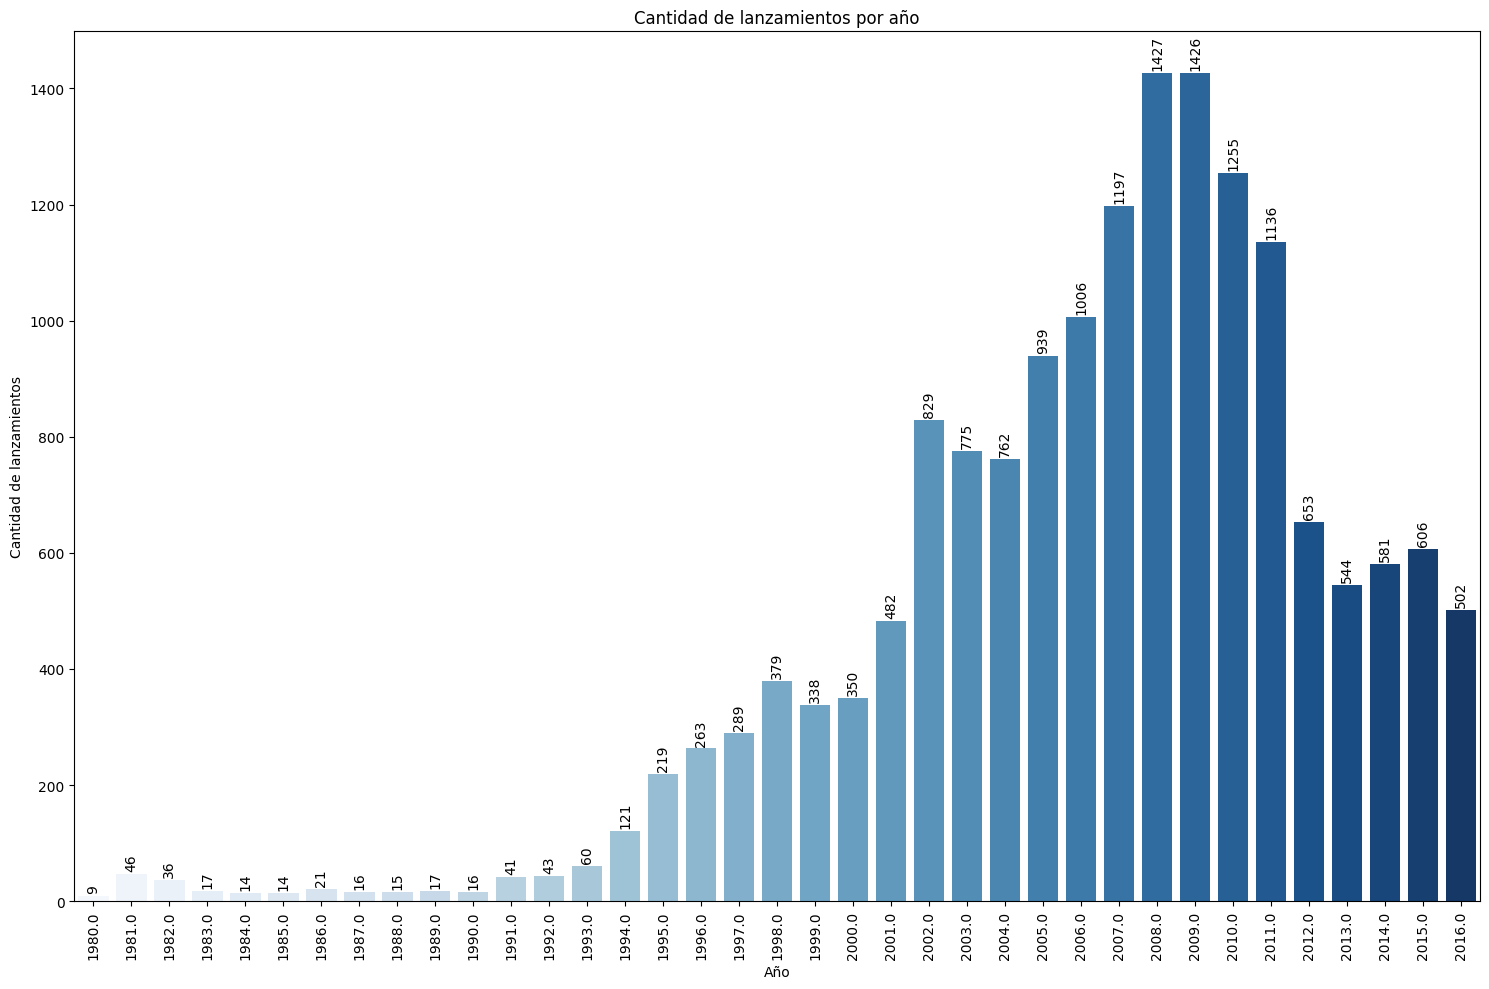

In [33]:
# 3.1 Distribución de juegos durante su año de lanzamiento
games_per_year = games['year_of_release'].value_counts().sort_index()

# Convertir Serie a DataFrame para la identificacion de las columnas
games_per_year_df = games_per_year.reset_index()
games_per_year_df.columns = ['Año', 'Qty lanzamientos por año']

#Verificar la impresion correcta de los datos
#print(games_per_year_df)

# Graficar los lanzamientos 
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=games_per_year_df, x='Año', y='Qty lanzamientos por año', palette="Blues")

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height+5,
            f'{int(height)}', ha='center', va='bottom', rotation=90)

plt.title('Cantidad de lanzamientos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de lanzamientos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Interpretacion de los datos para los lanzamientos anuales:

En la gráfica se puede observar que a partir del 2002 se ve un incremento gradual en los lanzamientos de video juegos.
Sin embargo, es hasta el 2005 cuando realmente comienza el crecimiento exponencial manteniendose hasta el 2011.

* Los años 2008 y 2009 destacan como los períodos con mayor cantidad de lanzamientos, lo que coincide con el auge de las consolas de nueva generacion.

Significancia de los datos por período:
* Antes de 2005: Los datos son limitados, con pocos lanzamientos anuales
* 2005-2011: Período más significativo con crecimiento exponencial
* Después de 2011: Se observa una estabilizacióon en los lanzamientos

In [34]:
#3.2 Distribucion de las ventas entre plataformas
#Distribucion de ventas entre plataformas
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Ventas totales por plataforma:\n", platform_sales)
print()
#Basado en los datos obtenidos, haremos el analisis basado en el Top 5 de plataformas

Ventas totales por plataforma:
 platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64



In [35]:
#platform ventas totales
#PS2     1255.77
#X360     971.42
#PS3      939.65
#Wii      907.51
#DS       806.12
#construye una distribución basada en los datos de cada año" = cómo se distribuyeron sus ventas a lo largo de los años

# Seleccionar las top 5 plataformas
top_5_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Filtrar datos solo para estas plataformas
top_platforms_data = games[games['platform'].isin(top_5_platforms)]

# Agrupar por plataforma y año, sumando las ventas totales
platform_year_sales = top_platforms_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
display(platform_year_sales)


,platform,year_of_release,total_sales
0,DS,1985.0,0.02
1,DS,2004.0,17.27
2,DS,2005.0,130.14
3,DS,2006.0,119.81
4,DS,2007.0,146.94
5,DS,2008.0,145.31
6,DS,2009.0,119.54
7,DS,2010.0,85.02
8,DS,2011.0,26.18
9,DS,2012.0,11.01


In [36]:
# Paso 1: Reorganizar los datos  
    #- Las filas sean los años
    #- Las columnas sean las plataformas (PS2, X360, PS3, Wii, DS,PS3)
    #- Los valores sean las ventas

pivot_data = platform_year_sales.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum' 
)
display(pivot_data)

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN
2000.0,NaN,39.17,NaN,NaN,NaN
2001.0,NaN,166.43,NaN,NaN,NaN
2002.0,NaN,205.38,NaN,NaN,NaN
2003.0,NaN,184.31,NaN,NaN,NaN
2004.0,17.27,211.81,NaN,NaN,NaN
2005.0,130.14,160.66,NaN,NaN,8.25
2006.0,119.81,103.42,20.96,137.15,51.62
2007.0,146.94,75.99,73.19,152.77,95.41


### Analisis de la tabla pivote Anterior

* PS2 dominó desde 2000-2005
* DS tuvo un gran pico en 2005-2009
* Wii y X360 tuvieron su mejor momento alrededor de 2007-2009

### Lanzamientos:
* PS2: Lanzada en marzo del 2000 
* DS: Lanzada en noviembre del 2004 
* X360: Lanzada en noviembre del 2005 
* Wii: Lanzada en noviembre del 2006 
* PS3: Lanzada en noviembre del 2006 

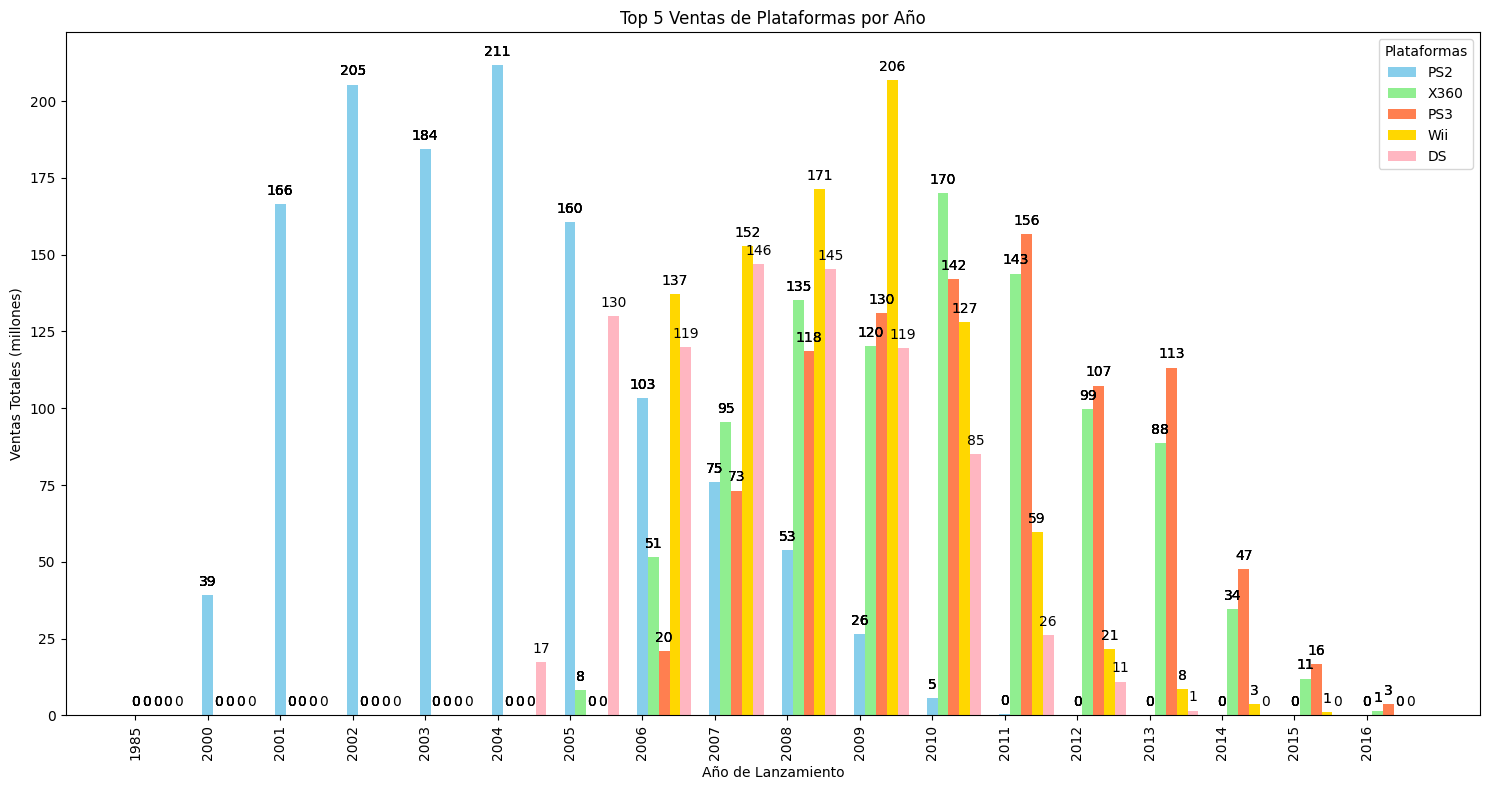

In [ ]:
#Referencias para abordar el tema
#https://www.datacamp.com/tutorial/python-bar-plot?utm_cid=21057859163&utm_aid=157296744657&utm_campaign=230119_1-ps-other~dsa~tofu_2-b2c_3-latam-en_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&utm_loc=9142079-&utm_mtd=-c&utm_kw=&utm_source=google&utm_medium=paid_search&utm_content=ps-other~latam-en~dsa~tofu~tutorial~python&gad_source=1&gad_campaignid=21057859163&gbraid=0AAAAADQ9WsHYFOFKU4mxTNaIBZfYmuwqI&gclid=CjwKCAiAuIDJBhBoEiwAxhgyFj0QStvacQkf3LHdypBpwfZDBgASgtG9P91Umkojts60FBaF6UqtiBoCK4YQAvD_BwE
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

#Preparar los datos
years = pivot_data.index.dropna()  # Años validos para graficar
bar_width = 0.15  #Tamano de barras mas pequenos por las 5 diferentes plataformas
x = np.arange(len(years)) #necesita posiciones numéricas en el eje X para colocar las barras. 
                        #años como [2000, 2001, 2002, ...], x será [0, 1, 2, ...].


# Lista de plataformas (equivalente a las especies de pingüinos del ejemplo)
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
colors = ['skyblue', 'lightgreen', 'coral', 'gold', 'lightpink']

# Crear el grafico
fig, ax = plt.subplots(figsize=(15, 8))

# Ciclo for con multiplier (como en el ejemplo de pingüinos)
multiplier = 0

for platform in platforms:
    offset = bar_width * multiplier
    sales_data = pivot_data[platform].fillna(0)  # Reemplazar NaN con 0
    rects = ax.bar(x + offset, sales_data, bar_width,label=platform, color=colors[multiplier])
    multiplier += 1

    # Agregar valores a la primera gráfica
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height+2, f'{int(height)}', ha='center', va='bottom')

# Configurar el gráfico
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.title('Top 5 Ventas de Plataformas por Año')
plt.xticks(x, years.astype(int), rotation=90)
plt.legend(title='Plataformas')
plt.tight_layout()
plt.show()

## Observaciones del gafrico anterior: 
### Patrones importantes:
* PS2 (2000-2005): Domina y luego desaparece
* PS3 (2006-2016): Toma el relevo de PS2
* DS (2005-2009): Pico fuerte pero corto
* X360 (2005-2011): Ciclo de vida medio
* Wii (2006-2010): Pico intenso pero breve

## Preguntas a responder :

3.3 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

* Con base en el analisis anterior: 
    * Se tomaran los datos del periodo 2005-2016: para incluir el ciclo completo de las plataformas modernas

        * Ciclos completos: ciclo de vida completo de las plataformas modernas
        * Nuewvos Releases: Incluyes el cambio PS2→PS3 y la emergencia de Nintendo DS/Wii
        * Relevancia para 2017: Las plataformas activas en 2016 son más predictivas para 2017
        * Datos significativos: Con base en el analisis de la grafica del 3.1 es dodne se muestra un nivel significativo de los lanzamientos

3.4 Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

* Por lo cual, se creara un dataframe nuevo a partir de los datos del 2005 hasta el 2011. (Fase de analisis yaque son fase de crecimiento y estabilidad) ya que a partir del 2012 hasta el 2016 existen declives pronunciados enla grafica, por lo cual los valores mostrados no serian singificativos para el analisis.


In [38]:
#dATAFRAME CON VALORES A PARTIR DEL 2005 HASTA 2011

# Filtrar datos solo para estas plataformas
data_2005_2011 = games.query("year_of_release >= 2005 and year_of_release <= 2011")
#print(data_2005_20016)

data_2005_2011_sales = data_2005_2011.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
display(data_2005_2011_sales)
print()
#Reorganizar los datos para venta del 2005 hasta 2016
    #- Las filas sean los años
    #- Las columnas sean las plataformas
    #- Los valores sean las ventas

pivot_data_2005_2011 = data_2005_2011_sales.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum' 
)
display(pivot_data_2005_2011)

,platform,year_of_release,total_sales
0,3DS,2011.0,63.20
1,DC,2007.0,0.02
2,DC,2008.0,0.04
3,DS,2005.0,130.14
4,DS,2006.0,119.81
...,...,...,...
56,X360,2011.0,143.84
57,XB,2005.0,49.08
58,XB,2006.0,10.04
59,XB,2007.0,0.55


platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PSP,PSV,Wii,X360,XB
year_of_release,,,,,,,,,,,,,
2005.0,NaN,NaN,130.14,33.86,27.62,4.37,160.66,NaN,43.84,NaN,NaN,8.25,49.08
2006.0,NaN,NaN,119.81,5.28,11.26,2.85,103.42,20.96,55.32,NaN,137.15,51.62,10.04
2007.0,NaN,0.02,146.94,3.40,0.27,9.28,75.99,73.19,46.93,NaN,152.77,95.41,0.55
2008.0,NaN,0.04,145.31,NaN,NaN,12.42,53.90,118.52,34.55,NaN,171.32,135.26,0.18
2009.0,NaN,NaN,119.54,NaN,NaN,16.91,26.40,130.93,37.78,NaN,206.97,120.29,NaN
2010.0,NaN,NaN,85.02,NaN,NaN,24.28,5.64,142.17,35.04,NaN,127.95,170.03,NaN
2011.0,63.2,NaN,26.18,NaN,NaN,35.03,0.45,156.78,17.82,4.63,59.65,143.84,NaN


Total de plataformas: 13


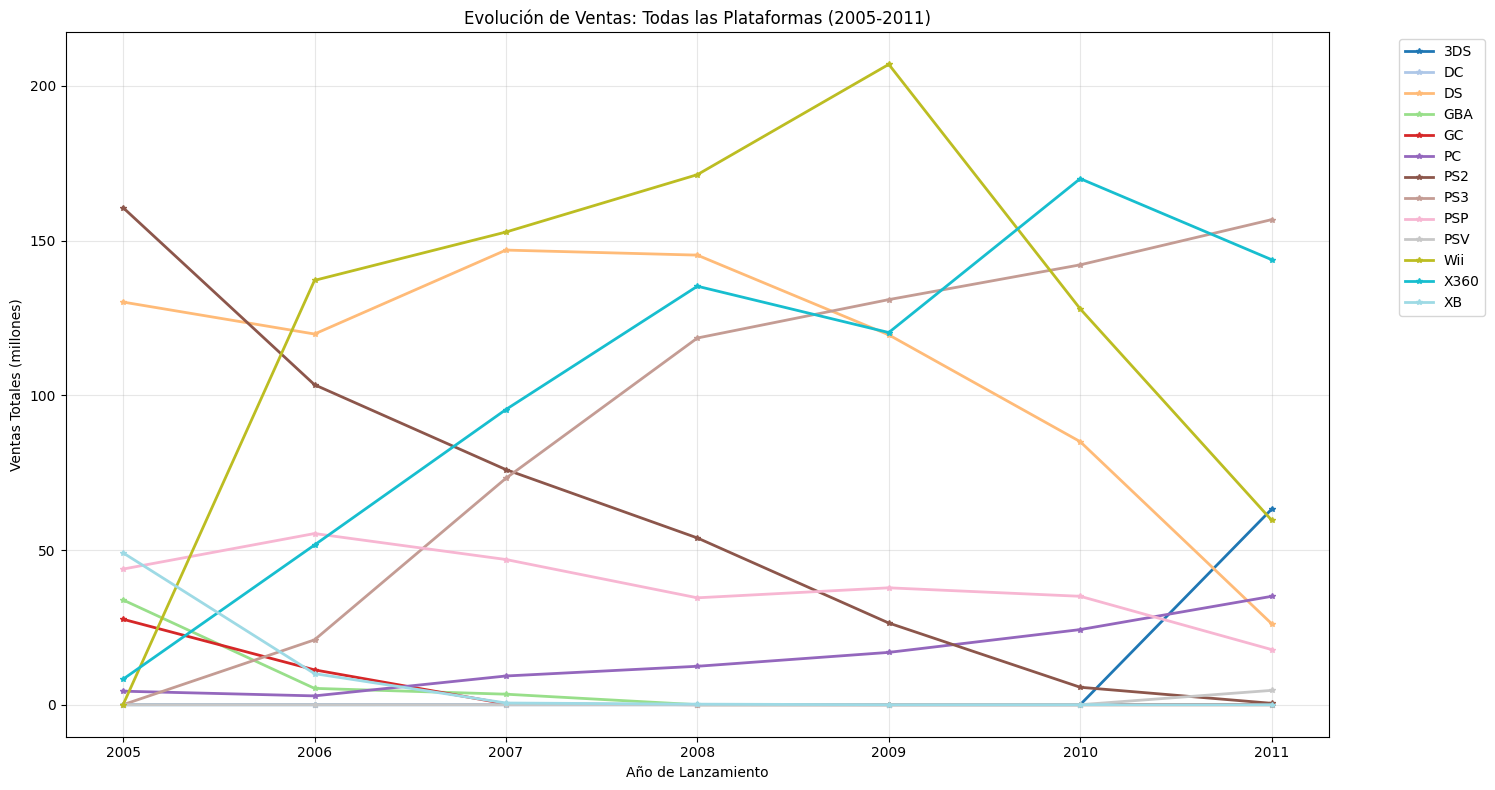

In [39]:
#https://matplotlib.org/stable/api/markers_api.html
# Obtener todas las plataformas únicas a partir del periodo 2005 al 2016
platforms = pivot_data_2005_2011.columns
years = pivot_data_2005_2011.index
print(f"Total de plataformas: {len(platforms)}")

# Generar colores automáticamente
import matplotlib.cm as cm
colors = cm.tab20(np.linspace(0, 1, len(platforms)))

# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 8))

for i, platform in enumerate(platforms):
    sales_data = pivot_data_2005_2011[platform].fillna(0)
    ax.plot(years, sales_data,
            label=platform,
            color=colors[i],
            marker='*',
            linewidth=2,
            markersize=4)

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.title('Evolución de Ventas: Todas las Plataformas (2005-2011)')
plt.xticks(years.astype(int))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### De acuerdo a la grafica anterior, se responderan las siguiente preguntas: 

3.5 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

* Ya que el grafico se encuentra demsiado saturado, se realizaran calculos adicionales para dar una mejor respuesta

In [40]:
# Seleccionar solo las 5 plataformas con mayores ventas totales durante 2005 al 2011
top_platforms_2005_2011 = data_2005_2011.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Plataformas 2005-2011: \n", top_platforms_2005_2011)
print()
print("Top 5 Plataformas con mas ventas durante 2005-2011:\n" ,top_platforms_2005_2011.head(5))

Plataformas 2005-2011: 
 platform
Wii     855.81
DS      772.94
X360    724.70
PS3     642.55
PS2     426.46
PSP     271.28
PC      105.14
3DS      63.20
XB       59.85
GBA      42.54
GC       39.15
PSV       4.63
DC        0.06
Name: total_sales, dtype: float64

Top 5 Plataformas con mas ventas durante 2005-2011:
 platform
Wii     855.81
DS      772.94
X360    724.70
PS3     642.55
PS2     426.46
Name: total_sales, dtype: float64


TOP 5 plataformas: ['Wii', 'DS', 'X360', 'PS3', 'PS2']


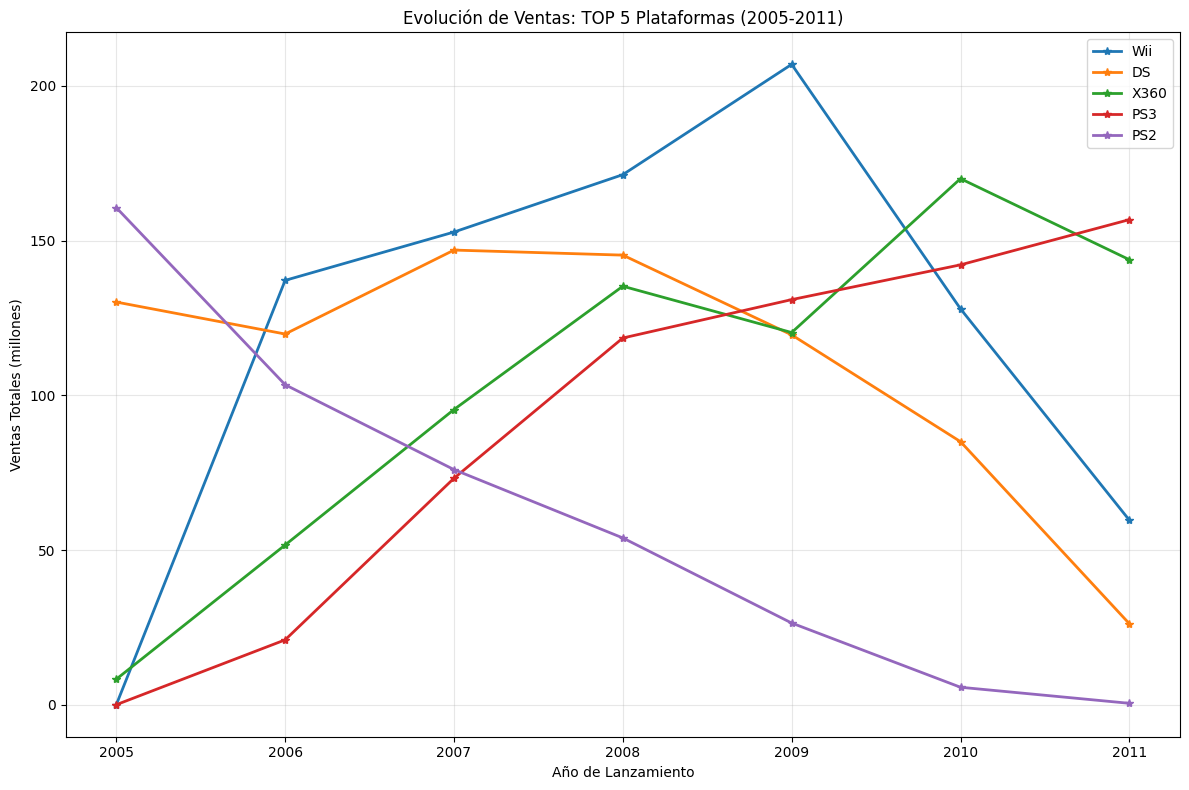

In [41]:
#Graficar los datos previamente limpiados 
# Obtener todas las plataformas Top 5 a partir del periodo 2005 al 2011
top_5_platforms_list = top_platforms_2005_2011.head(5).index.tolist()
print("TOP 5 plataformas:", top_5_platforms_list)
years = pivot_data_2005_2011.index  # Los años del período 2005-2011

# Filtrar solo las TOP 5 plataformas
pivot_top_5_platforms = pivot_data_2005_2011[top_5_platforms_list] 

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 8))
colors_top = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, platform in enumerate(pivot_top_5_platforms.columns):
    sales_data = pivot_top_5_platforms[platform].fillna(0)
    ax.plot(years, sales_data,
            label=platform,
            color=colors_top[i],
            marker='*',
            linewidth=2,
            markersize=6)

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.title('Evolución de Ventas: TOP 5 Plataformas (2005-2011)')
plt.xticks(years.astype(int))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Con base en la grafica anterior, se responderan las siguientes preguntas aL punto 3.5 : 

3.5.1¿Qué plataformas son líderes en ventas?:
* Wii: Dominó el mercado entre 2007-2009 con ventas altas
* PS3: Mantuvo ventas consistentes y mostro crecimiento sostenido
* X360: Tuvo un desempeño solido y estable durante todo el período

3.5.2¿Cuáles crecen y cuáles se reducen?:
Plataformas en crecimiento:
* PS3: Tendencia ascendente clara desde 2007, especialmente fuerte despues de 2008
* X360: Crecimiento constante y sostenido

* Plataformas que  se reducen:
    * PS2: Declive pronunciado desde 2005 
    * Wii: Despues del pico en 2008-2009, muestra descenso dramatico
    * DS: Tendencia descendente general (tuvo un pico en 2007 pero nada significativo)

3.5.3Plataformas potencialmente rentables para 2017:
* PS3: Por su crecimiento sostenido y estabilidad
* X360: Por su consistencia y tendencia positiva

Estas dos plataformas muestran patrones de crecimiento que sugieren que podrían seguir siendo rentables, mientras que las otras estan en declive.

### 3.6 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

Se crearan 2 graficos de caja:

* Definiendo todos los datos de las 13 plataformas que corresponde al periodo del 2005 al 2011
    * vision general de todas las plataformas del periodo relevante

* Top 5 plataformas
    * enfocado en las plataformas mas relevantes y detalladas ya que estan siendo lideres en ventas. 

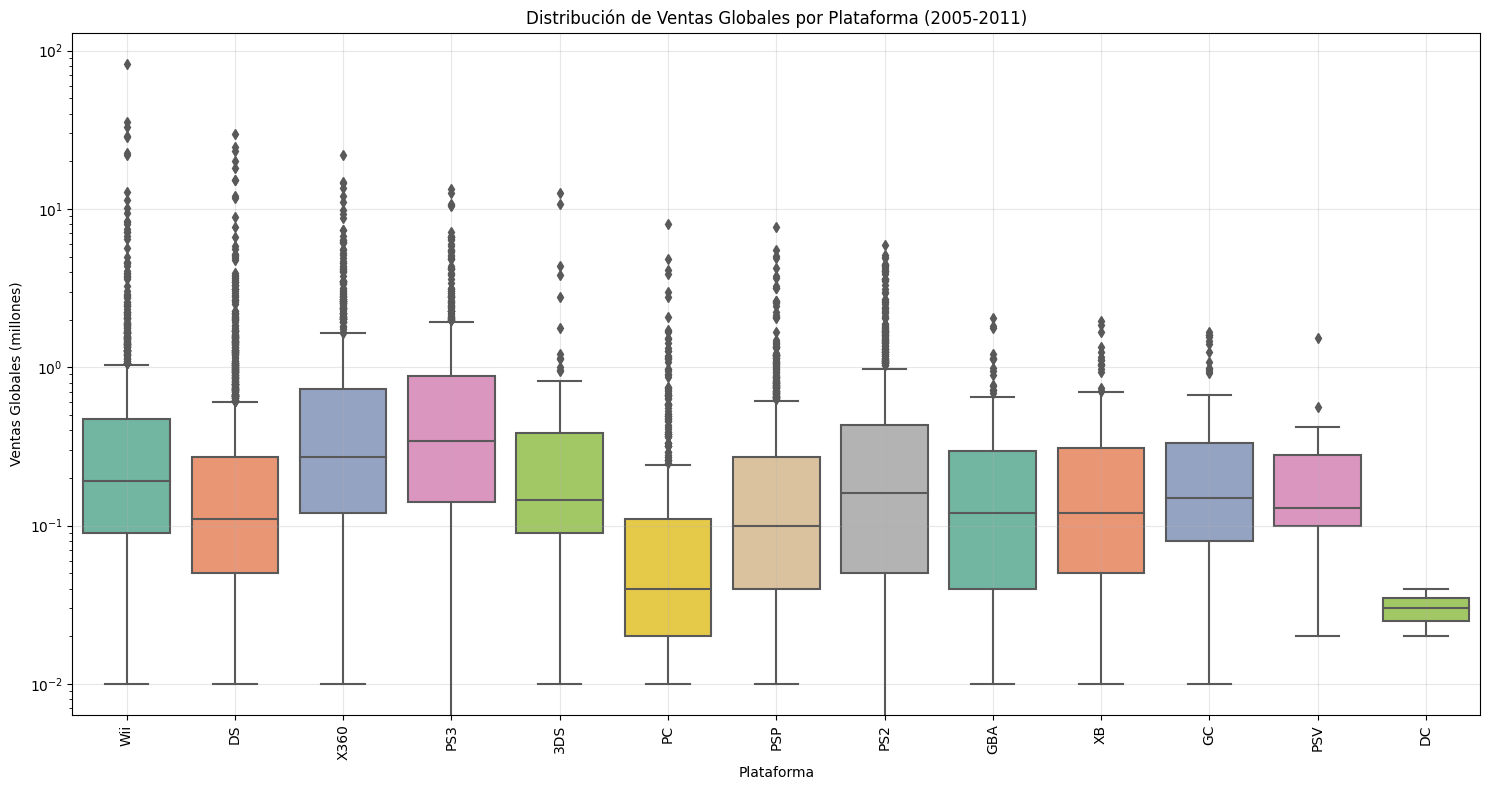

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PSP,PSV,Wii,X360,XB
count,116.000000,2.000000,2066.000000,180.000000,141.000000,563.000000,1065.000000,813.000000,1005.000000,18.000000,1232.000000,940.000000,245.000000
mean,0.544828,0.030000,0.374124,0.236333,0.277660,0.186750,0.400432,0.790344,0.269930,0.257222,0.694651,0.770957,0.244286
std,1.618264,0.014142,1.427188,0.326826,0.347492,0.550222,0.707855,1.360652,0.557504,0.349299,3.224631,1.607309,0.313675
min,0.010000,0.020000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.010000,0.020000,0.010000,0.010000,0.010000
25%,0.090000,0.025000,0.050000,0.040000,0.080000,0.020000,0.050000,0.140000,0.040000,0.100000,0.090000,0.120000,0.050000
50%,0.145000,0.030000,0.110000,0.120000,0.150000,0.040000,0.160000,0.340000,0.100000,0.130000,0.190000,0.270000,0.120000
75%,0.382500,0.035000,0.270000,0.295000,0.330000,0.110000,0.430000,0.880000,0.270000,0.277500,0.472500,0.730000,0.310000
max,12.650000,0.040000,29.800000,2.050000,1.680000,8.010000,5.950000,13.330000,7.680000,1.540000,82.540000,21.820000,1.960000


In [42]:
#https://matplotlib.org/stable/gallery/scales/log_demo.html
#https://www.geeksforgeeks.org/data-visualization/logarithmic-scaling-in-data-visualization-with-seaborn/

#Diagrama de caja 1: Las 13 plataformas (2005-2011)
#"Ventas globales" - columna total_sales con "Todos los juegos" del dataset agrupados por plataforma.
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_2005_2011,
           x='platform',
           y='total_sales',
           palette='Set2')

plt.title('Distribución de Ventas Globales por Plataforma (2005-2011)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.yscale('log')  # Escala logarítmica
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print()
platform_stats = data_2005_2011.groupby('platform')['total_sales'].describe()
#display("Estadísticas por plataforma (2005-2011):\n" , platform_stats)
#print(type(platform_stats))

#Dado, que por visualizacion no interpretaba correctamente los datos, cambie la posicion de la tabla. 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html
# Para voltear cualquier DataFrame existente:
df_volteado_2005_2011 = platform_stats.transpose()
display(df_volteado_2005_2011)

### Interpretacion de los box plots para los datos de 2005 al 2011 (13 plataformas)

Hallazgos Principales:

1. Lider en Ventas:
- PS3 presenta la mediana más alta de ventas, posicionándose como la plataforma con mejor rendimiento en el período analizado.

2. Variabilidad en el Mercado:
- PS3 y PS2 muestran bigotes extensos, indicando alta variabilidad en las ventas 
    -desde juegos con ventas bajas hasta grandes éxitos comerciales.
- Las cajas de diferentes tamaños revelan que cada plataforma tiene patrones de distribución únicos.

3. Distribución Sesgada:
- Todas las plataformas presentan distribuciones sesgadas hacia la derecha dado que la media > mediana, que podria coincidir con que haya valores dispersos en tema de ventas, es decir que hay vents atipicas para los juegos que se convierten en hits.

4. Valores Atípicos:
- Wii presenta el valor atípico más alto (82,54 vs el resto de los valores maximos en un rango de 1-30), 
    -sugiriendo la presencia de juegos mas vendidos en el mercado.

5. Plataformas de Bajo Rendimiento:
- DC y PSV registraron ventas  bajas (medias < 1 , valores ceros), indicando limitado éxito comercial.

Implicaciones para el Modelo 2017:
Los valores atipicos de wii, deberian considerarse en el analisis debido a que representan hits en ventas.

Por lo cual segmentare la informacion al top 5 plataformas para ver si exiten mas patrones para la observacion.

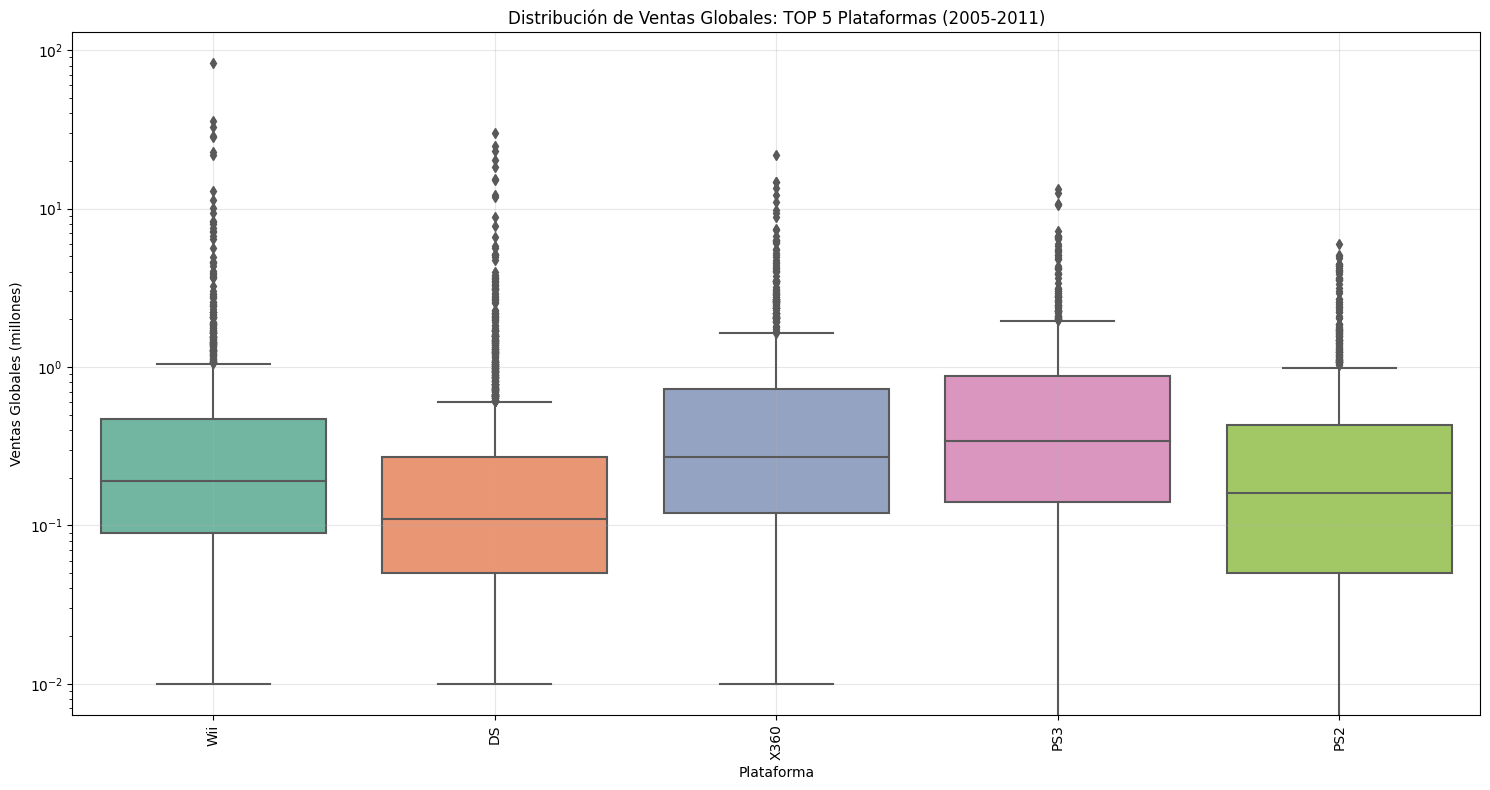

platform,DS,PS2,PS3,Wii,X360
count,2066.000000,1065.000000,813.000000,1232.000000,940.000000
mean,0.374124,0.400432,0.790344,0.694651,0.770957
std,1.427188,0.707855,1.360652,3.224631,1.607309
min,0.010000,0.000000,0.000000,0.010000,0.010000
25%,0.050000,0.050000,0.140000,0.090000,0.120000
50%,0.110000,0.160000,0.340000,0.190000,0.270000
75%,0.270000,0.430000,0.880000,0.472500,0.730000
max,29.800000,5.950000,13.330000,82.540000,21.820000


In [43]:
#https://matplotlib.org/stable/gallery/scales/log_demo.html
#https://www.geeksforgeeks.org/data-visualization/logarithmic-scaling-in-data-visualization-with-seaborn/

#Diagrama de caja 2: Top 5plataformas (2005-2011)
#"Ventas globales" - columna total_sales con "Todos los juegos" del dataset agrupados por plataforma.

# Filtrar solo las top 5 plataformas del período 2005-2011
top_5_data = data_2005_2011[data_2005_2011['platform'].isin(top_5_platforms_list)]

# Crear el boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=top_5_data,
           x='platform',
           y='total_sales',
           palette='Set2')

plt.title('Distribución de Ventas Globales: TOP 5 Plataformas (2005-2011)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.yscale('log') 
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print()
platform_stats_top_5 = top_5_data.groupby('platform')['total_sales'].describe()
#display("Estadísticas por Top 5 plataformas (2005-2011):\n" , platform_stats_top_5)
#print(type(platform_stats_top_5))

#Dado, que por visualizacion no interpretaba correctamente los datos, cambie la posicion de la tabla. 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html
# Para voltear cualquier DataFrame existente:
df_volteado_top_5 = platform_stats_top_5.transpose()
display(df_volteado_top_5)

### Resumen - Analisis de Box Plots (2005-2011) - TOP 5 

Hallazgos Clave:
1. Medianas:
    - PS3: Mediana más alta (0.17), confirmando la priemra posicion
    - Xbox 360: Segunda posición (0.15), 
    - Wii: Tercera posición (0.12), pero con valores atipicos

2. Variabilidad y Consistencia:
    - Tamaño de cajas similar: Todas las plataformas muestran variabilidad parecida 
    - Bigotes más largos: PS3 y Xbox 360 tienen mayor rango de ventas

3. Valores atipicos:
    - Wii: Presenta mas valores atipicos mas grandes, lo que demuestra hits en ventas
    - PS3: También muestra  valores atipicos significativos
        :
        - Juegos que se convirtieron en fenomenos en ventas
        - Juegos mas vendidos por cada una de la paltaforma


### 3.6 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.

* Crear gráfico de dispersión entre user_score/critic_score vs total_sales
    * Calcular correlaciones y sacar conclusiones

La plataforma que se eligio fue PS3 debido a los siguiente datos
* Tiene la mediana más alta de ventas
* Muestra crecimiento sostenido
* Tiene suficientes datos de critic_score y user_score

In [44]:
#PS3
ps3_data = top_5_data[top_5_data['platform'] == 'PS3']
display(ps3_data)
print()
critic_score_count = ps3_data['critic_score'].notna().sum()
user_score_count = ps3_data['user_score'].notna().sum()
ps3_total_games = len(ps3_data)

print(f"Total juegos PS3: {ps3_total_games}")
print()
print(f"Cantidad de critic_scores: {critic_score_count}") #Escala de 0 a 100
print(f"Porcentaje de critic_scores: {critic_score_count/ps3_total_games*100:.1f}%")
print()
print(f"Cantidad de user_scores: {user_score_count} ") #Escala de 0 a 10
print(f"Porcentaje de critic_scores: {user_score_count/ps3_total_games*100:.1f}%")
print()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010.0,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M,10.61
57,Grand Theft Auto IV,PS3,2008.0,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16343,Mahjong Taikai IV,PS3,2006.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16360,Makai Senki Disgaea 3 Append Disc: Raspberyl-h...,PS3,2009.0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16516,Railfan,PS3,2006.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16639,WSC REAL 09: World Snooker Championship,PS3,2009.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01



Total juegos PS3: 813

Cantidad de critic_scores: 590
Porcentaje de critic_scores: 72.6%

Cantidad de user_scores: 578 
Porcentaje de critic_scores: 71.1%



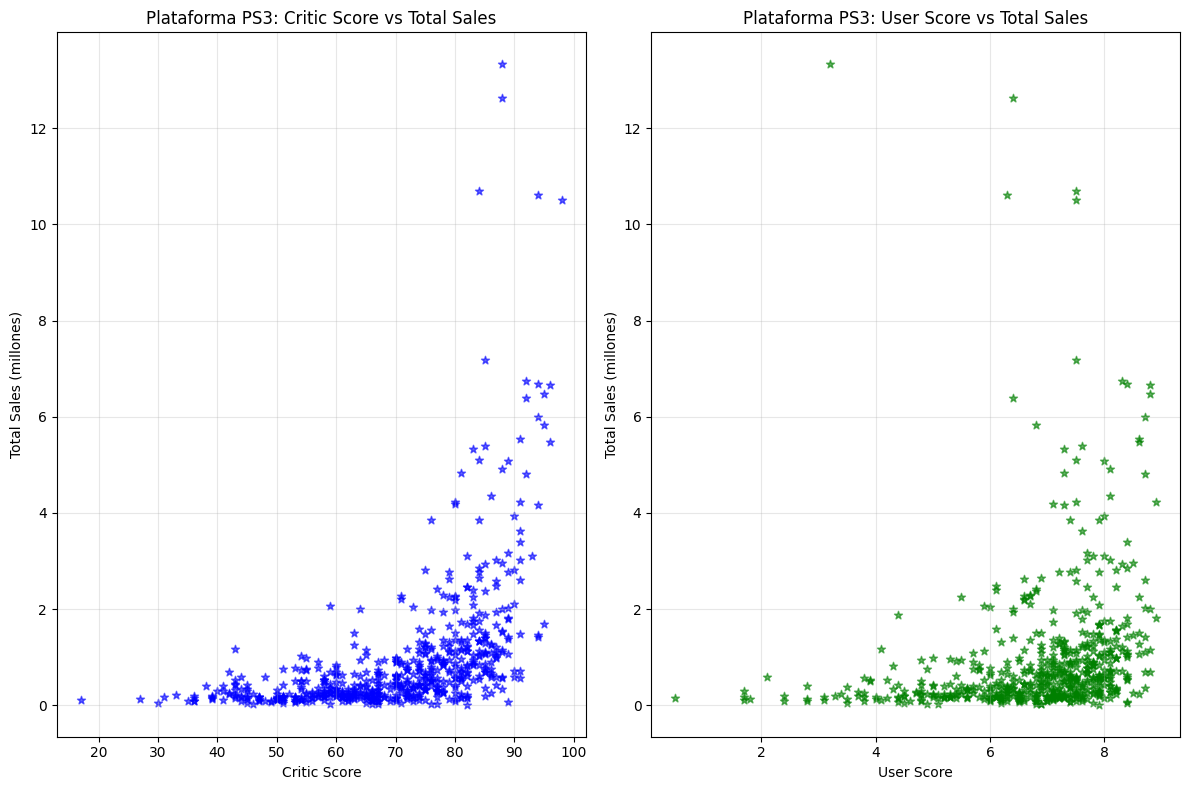

In [45]:
#https://python-charts.com/es/correlacion/grafico-dispersion-matplotlib/
#https://python-charts.com/es/correlacion/grafico-dispersion-matplotlib/#scatter
#https://interactivechaos.com/es/manual/tutorial-de-matplotlib/graficos-de-dispersion
# Crear subplots para ambos graficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

# Grafico 1: critic_score vs total_sales
ps3_critic_data = ps3_data.dropna(subset=['critic_score', 'total_sales']) #Eliminar valores NAN en critic_score y total_sales
#critic_score = Eje X (horizontal)
#total_sales = Eje Y (vertical)
ax1.scatter(ps3_critic_data['critic_score'], ps3_critic_data['total_sales'], alpha=0.6, color='blue', marker = "*") 
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Total Sales (millones)')
ax1.set_title('Plataforma PS3: Critic Score vs Total Sales')
ax1.grid(True, alpha=0.3)

# Grafico 2: user_score vs total_sales  
ps3_user_data = ps3_data.dropna(subset=['user_score', 'total_sales'])#Eliminar valores NAN en user_score y total_sales
#user_score = Eje X (horizontal)
#total_sales = Eje Y (vertical)
ax2.scatter(ps3_user_data['user_score'], ps3_user_data['total_sales'], alpha=0.6, color='green',marker = "*")
ax2.set_xlabel('User Score')
ax2.set_ylabel('Total Sales (millones)')
ax2.set_title('Plataforma PS3: User Score vs Total Sales')
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [46]:
#https://cienciadedatos.net/documentos/pystats05-correlacion-lineal-python
#https://www.datacamp.com/tutorial/tutorial-datails-on-correlation (Interpretacion de las correlaciones)
# Calcular correlaciones para columnas numericas en pandas
critic_correlation = ps3_critic_data['critic_score'].corr(ps3_critic_data['total_sales'])
user_correlation = ps3_user_data['user_score'].corr(ps3_user_data['total_sales'])

print(f"Correlacion critic_score vs total_sales; \n {critic_correlation}")
print()
print(f"Correlacion user_score vs total_sales:\n {user_correlation}")

Correlacion critic_score vs total_sales; 
 0.4891965336668365

Correlacion user_score vs total_sales:
 0.21902452306360043


### Analisis de los resultados para las correlaciones PS3

* Escala de Interpretación de Correlaciones
(Los coeficientes de correlación van de -1 a +1:)
    * 0.0 - 0.2: Correlación muy débil o inexistenteYA Y
    * 0.2 - 0.4: Correlación débil
    * 0.4 - 0.6: Correlación moderada
    * 0.6 - 0.8: Correlación fuerte
    * 0.8 - 1.0: Correlación muy fuerte


* Critic Score (0.489):
    * Correlacion moderada entre critic_score y total_sales 
    * Existe una relación positiva: a mayor critic_score, tienden a ser mayores las ventas

* User Score (0.219):
    * Correlacion debil entre las user_score y total_sales
    * Las reseñas de usuarios no influyen en las ventas de los juegos ( para este caso)

En este caso particular, tiene mayor peso la calificacion de los criticos, ya que al tratarse de juegos vendidos en varias partes del mundo, es mas sencillo validar informacion de criticos, no tanto como usuarios, que va en cuestion de gustos hacia un juego.

### Paso 3.7: Comparar ventas en otras plataformas
Teniendo en cuenta tus conclusiones, compara las ventas de los mismos juegos en otras plataformas

* Pasos para el analisis:
    * Analizar las correlaciones entre reseñas y ventas en otras plataformas del top 5
    * Comparar si los patrones que encontraste en PS3 se repiten
    * Determinar si la mayor influencia de críticos vs usuarios es general o específica de PS3

In [47]:
# Para las plataformas faltantes del top 5 
#Creare una funcion para obtener los datos de las plataformas faltantes 
def platform_correlations_top_5(platform_name, data):
    #Filtrado de la plataforma especifica 
    platform_data = data[data['platform'] == platform_name]

    # Datos para critic_score
    critic_data = platform_data.dropna(subset=['critic_score', 'total_sales']) #Elimina valores NAN
    critic_corr = critic_data['critic_score'].corr(critic_data['total_sales'])

    # Datos para user_score
    user_data = platform_data.dropna(subset=['user_score', 'total_sales']) #Elimina valores NAN
    user_corr = user_data['user_score'].corr(user_data['total_sales'])

    return critic_corr, user_corr

# Plataformas restantes 
platforms = ['Wii', 'DS', 'X360', 'PS2']

for platform in platforms:
    critic_corr, user_corr = platform_correlations_top_5(platform, top_5_data) 
    print(f"Plataforma:{platform}\n Critic_Score ={critic_corr:.3f}, User_Score={user_corr:.3f}")
    print()

Plataforma:Wii
 Critic_Score =0.177, User_Score=0.113

Plataforma:DS
 Critic_Score =0.239, User_Score=0.132

Plataforma:X360
 Critic_Score =0.402, User_Score=0.155

Plataforma:PS2
 Critic_Score =0.425, User_Score=0.190



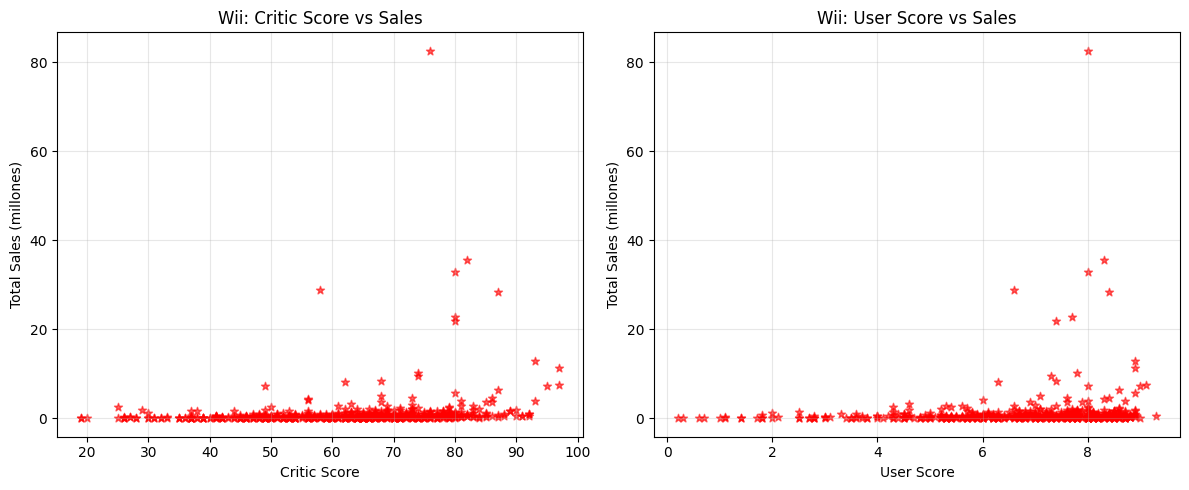

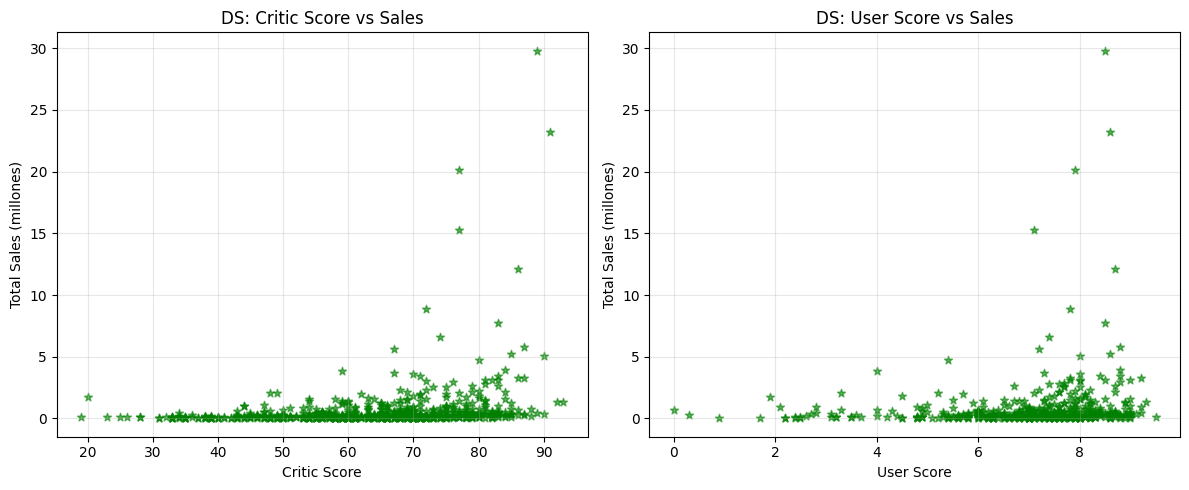

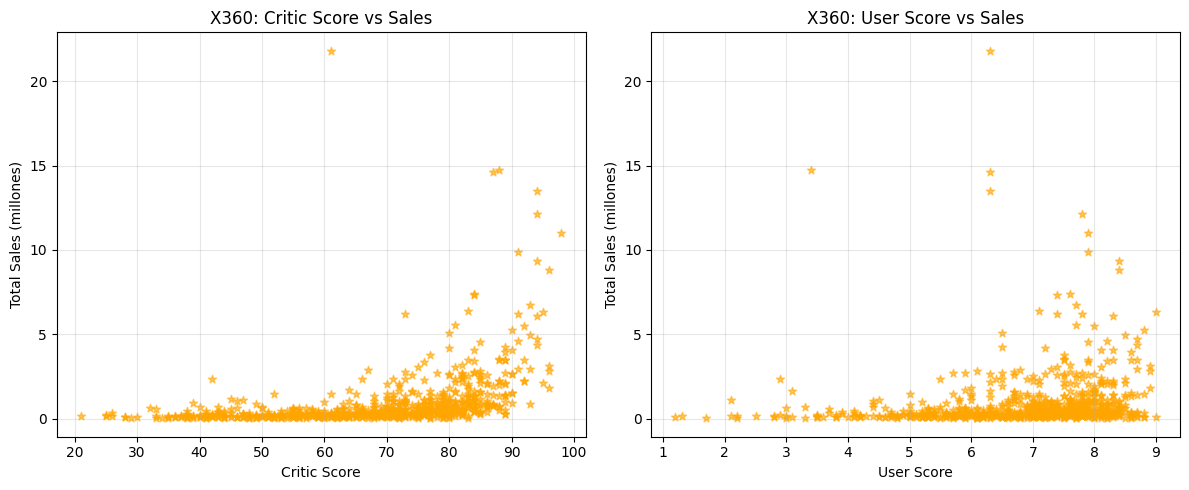

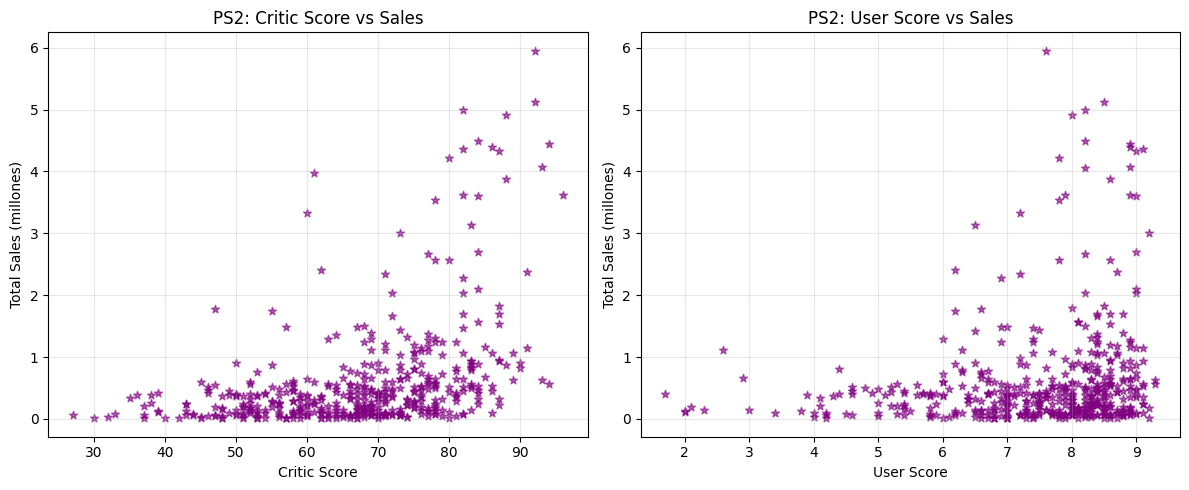

In [48]:
#https://www.google.com/search?q=subplot+scatter+enphyton&oq=subplot++scatter+enphyton&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIJCAEQIRgKGKABMgkIAhAhGAoYoAHSAQg5MDI5ajBqN6gCALACAA&sourceid=chrome&ie=UTF-8
#https://www.google.com/search?q=subplot+%281%2C2%2C1%29+scatter+enphyton&sca_esv=fcbfcae5e87b23b9&sxsrf=AE3TifMFY756daUVMLOPrH_LaPqmiKtYkw%3A1763926685792&ei=nWIjadOEMLr4kPIP4vCwiAo&ved=0ahUKEwiTx5D8gomRAxU6PEQIHWI4DKEQ4dUDCBE&uact=5&oq=subplot+%281%2C2%2C1%29+scatter+enphyton&gs_lp=Egxnd3Mtd2l6LXNlcnAiIHN1YnBsb3QgKDEsMiwxKSBzY2F0dGVyIGVucGh5dG9uMgoQIRigARjDBBgKSINkUNpAWNFicAN4AJABAJgB9wGgAagNqgEFMC44LjG4AQPIAQD4AQGYAgqgAscLwgIKEAAYsAMY1gQYR8ICBhAAGA0YHsICCBAAGAgYDRgewgIIEAAYgAQYogTCAgUQABjvBcICCBAhGKABGMMEwgIEECEYCpgDAOIDBRIBMSBAiAYBkAYIkgcFMy4yLjWgB6cmsgcFMC4yLjW4B54LwgcHMC4xLjQuNcgHUA&sclient=gws-wiz-serp
#Creacion de graficos de dispersion para el resto de las plataformas 
# Crear gráficos individuales para cada plataforma
platforms = ['Wii', 'DS', 'X360', 'PS2']
colors = ['red', 'green', 'orange', 'purple']

for i, platform in enumerate(platforms):
    platform_data = top_5_data[top_5_data['platform'] == platform]
    
    # Graficca para critic_score
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1) #Dividir la cuadricula en 1 fila con 2 columnas y se coloque la priemra grafica del lado izquierdo
    critic_data = platform_data.dropna(subset=['critic_score', 'total_sales'])
    plt.scatter(critic_data['critic_score'], critic_data['total_sales'], alpha=0.6, color=colors[i], marker='*')
    plt.title(f'{platform}: Critic Score vs Sales')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales (millones)')
    plt.grid(True, alpha=0.3)

     # Grafica para user_score
    plt.subplot(1, 2, 2)
    user_data = platform_data.dropna(subset=['user_score', 'total_sales'])
    plt.scatter(user_data['user_score'], user_data['total_sales'],alpha=0.6, color=colors[i], marker='*')
    plt.title(f'{platform}: User Score vs Sales')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales (millones)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()#Ajusta los graficos al espacio disponible
    plt.show()

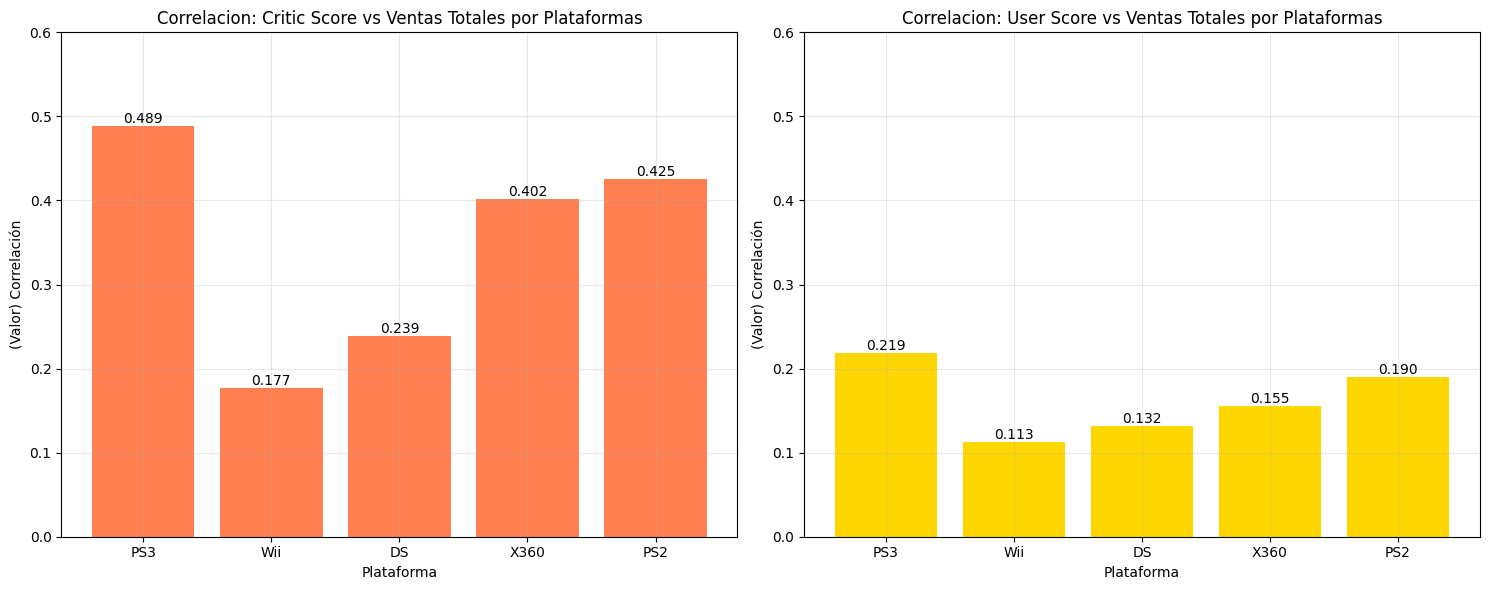

In [49]:
# Crear un DataFrame con todas las correlaciones
correlations_data = {
    'Platform': ['PS3', 'PS3', 'Wii', 'Wii', 'DS', 'DS', 'X360', 'X360', 'PS2', 'PS2'],
    'Score_Type': ['Critic', 'User', 'Critic', 'User', 'Critic', 'User', 'Critic', 'User', 'Critic', 'User'],
    'Correlation': [0.489, 0.219, 0.177, 0.113, 0.239, 0.132, 0.402, 0.155, 0.425, 0.190]
}

correlations_df = pd.DataFrame(correlations_data)

# Separar los datos por tipo de score
critic_data = correlations_df[correlations_df['Score_Type'] == 'Critic']
user_data = correlations_df[correlations_df['Score_Type'] == 'User']

plt.figure(figsize=(15, 6))

# Subplot 1: Critic Score
plt.subplot(1, 2, 1)
bars1 = plt.bar(critic_data['Platform'], critic_data['Correlation'], color='coral')
plt.title('Correlacion: Critic Score vs Ventas Totales por Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('(Valor) Correlación')
plt.ylim(0, 0.6)
plt.grid(True, alpha=0.3)

# Agregar valores a las barras del primer subplot
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,  format(height, '.3f'), ha='center', va='bottom')

# Subplot 2: User Score
plt.subplot(1, 2, 2)
bars2 = plt.bar(user_data['Platform'], user_data['Correlation'], color='gold')
plt.title('Correlacion: User Score vs Ventas Totales por Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('(Valor) Correlación')
plt.ylim(0, 0.6)
plt.grid(True, alpha=0.3)

# Agregar valores a las barras del segundo subplot
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, format(height, '.3f'), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Analisis de los resultados para las correlaciones del TOP 5 

* Escala de Interpretación de Correlaciones
(Los coeficientes de correlación van de -1 a +1:)
    * 0.0 - 0.2: Correlación muy débil o inexistente
    * 0.2 - 0.4: Correlación débil
    * 0.4 - 0.6: Correlación moderada
    * 0.6 - 0.8: Correlación fuerte
    * 0.8 - 1.0: Correlación muy fuerte

* Critic_Score 
    * Se tiene que para los valores de Critic score las plataformas PS3, PS2 y Xbox(.489,0.425,0.402 respectivamente) tienen una correlacion moderada eso significa que cuando una variable tiende a cambiar, la otra cambia en la misma direccion, incluyendo que existen valores de dispersion considerables entre los datos. 
    * En comparacion con las plataformas de DS y WII tienen una relacion muy debil o casi inexistente sto significa que los cambios de una variable no predicen de manera confiable los cambios en la otra variable por lo cual al verificar la grafica se puede niotar que los puntos estan muy dispersos y no se sigue un patron claro

* User_Score
    * Para las plataformas Wii, DS, X360, PS2 se puede notar que se tiene un valor de correlacion muy debil (0 a 0.2) por lo cual estos valores no representan significancia para poder visualizar una relacion entre los gustos del jugador y sus ventas. 
    * En cambio para PS3 esta mostrando una correlacion debil (.219) 

En este caso, las criticas por usuario, no presentan una relacion para la toma de decisiones par la compra de juegos. En cuanto a los Critic_score, como mencionamos anteriormente, su peso en cuando a comentarios mundiales, es uan referencia mas clara para  los jugadores antes de influir en la compra de sus nuevos videojuegos. 

### Paso 3.8: Análisis de géneros
"Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

* Plan para el analisis: 
    * Crear visualizaciones de la distribución de juegos por género
    * Identificar los generos mas vendidos
    * Analizar patrones de ventas altas vs bajas por género
    * Sacar conclusiones generales

In [50]:
#Distribucion de juegos por genero en los datos del 2005-2011
#display(data_2005_2011.head(5))

qty_genre = data_2005_2011['genre'].value_counts()
print("Cantidad de juegos por genero:\n" , qty_genre)
print()

#Obtener las ventas totales por genero 
genre_sales_platform = data_2005_2011.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("Ventas Totales por genero:\n" , genre_sales_platform)

Cantidad de juegos por genero:
 Action          1543
Misc            1176
Sports          1115
Adventure        763
Role-Playing     697
Shooter          598
Simulation       564
Racing           523
Puzzle           371
Strategy         351
Fighting         347
Platform         338
Name: genre, dtype: int64

Ventas Totales por genero:
 genre
Action          760.92
Sports          672.27
Misc            530.79
Shooter         453.83
Role-Playing    357.98
Racing          301.53
Platform        242.06
Simulation      234.50
Fighting        163.58
Adventure       120.38
Puzzle          105.39
Strategy         65.08
Name: total_sales, dtype: float64


In [51]:
#Crear un DataFrame consolidado
total_sales_by_gender_platfom = pd.DataFrame (
    {
        'cantidad_juegos' : qty_genre,
        'ventas_totales'  : genre_sales_platform
    }
)

#display(total_sales_by_gender_platfom)

#Ventas promedio - Cuanto vende un juego en cada tipo de genero
total_sales_by_gender_platfom['ventas_promedio']= total_sales_by_gender_platfom['ventas_totales'] / total_sales_by_gender_platfom['cantidad_juegos']

#Ordenar por cantidad de jeugos de mayor a menor
total_sales_by_gender_ordered = total_sales_by_gender_platfom.sort_values('cantidad_juegos', ascending=False)

display(total_sales_by_gender_ordered)

,cantidad_juegos,ventas_totales,ventas_promedio
Action,1543,760.92,0.493143
Misc,1176,530.79,0.451352
Sports,1115,672.27,0.602933
Adventure,763,120.38,0.157772
Role-Playing,697,357.98,0.513601
Shooter,598,453.83,0.758913
Simulation,564,234.50,0.415780
Racing,523,301.53,0.576539
Puzzle,371,105.39,0.284070
Strategy,351,65.08,0.185413


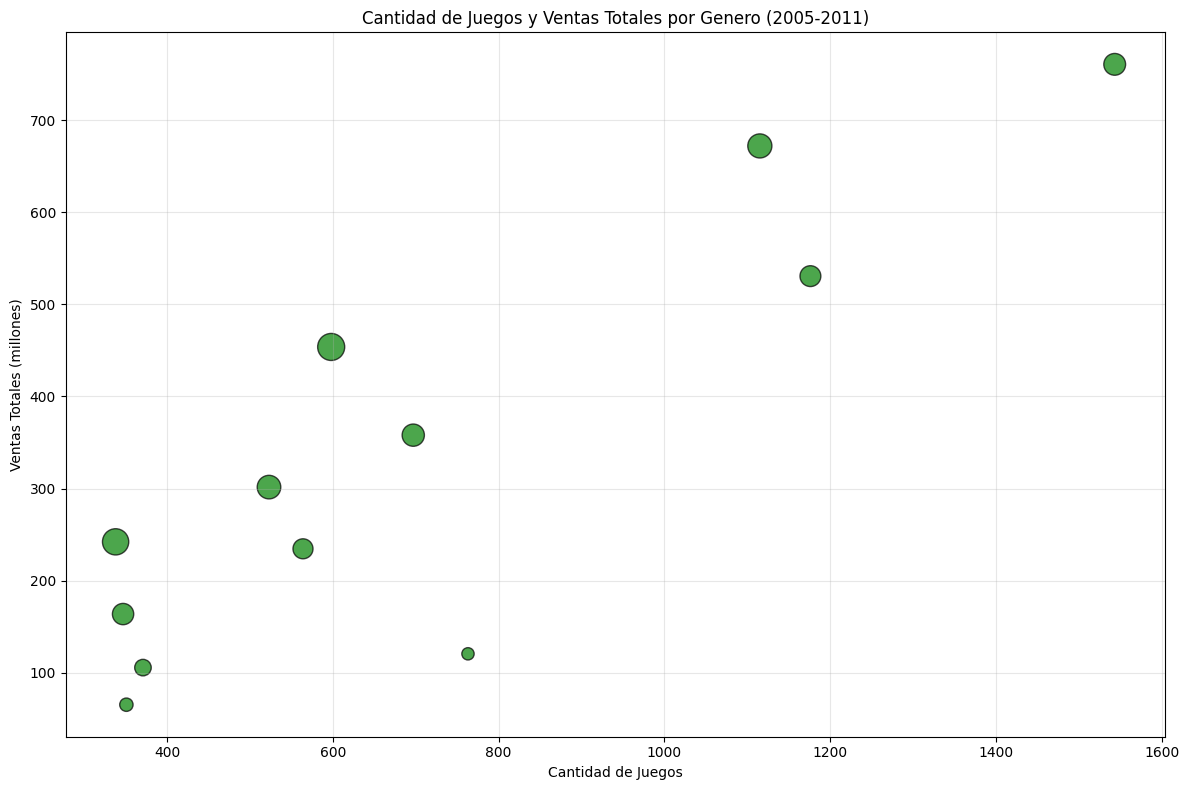

In [52]:
#https://python-charts.com/correlation/scatter-plot-matplotlib/
# Grafica de dispersion por genero y cantidad de ventas
#Se asigna el tamano de los puntos con base las vents promedio, ya que nos muestran el exito de un juego de cada genero,
size = total_sales_by_gender_ordered['ventas_promedio'] * 500  # Factor de escala mas grande por los valores de ventas promedio 

plt.figure(figsize=(12, 8))

# Crear el scatter plot
plt.scatter(total_sales_by_gender_ordered['cantidad_juegos'], 
           total_sales_by_gender_ordered['ventas_totales'],
           s=size,  # Tamaño de los puntos
           alpha=0.7,
           color='green',
           edgecolors='black',
           linewidth=1)


plt.xlabel('Cantidad de Juegos')
plt.ylabel('Ventas Totales (millones)')
plt.title('Cantidad de Juegos y Ventas Totales por Genero (2005-2011)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

       cantidad_juegos  ventas_totales  ventas_promedio
count        12.000000       12.000000        12.000000
mean        698.833333      334.025833         0.468924
std         388.392452      227.438771         0.188738
min         338.000000       65.080000         0.157772
25%         366.000000      152.780000         0.382853
50%         581.000000      271.795000         0.482278
75%         851.000000      473.070000         0.583138
max        1543.000000      760.920000         0.758913



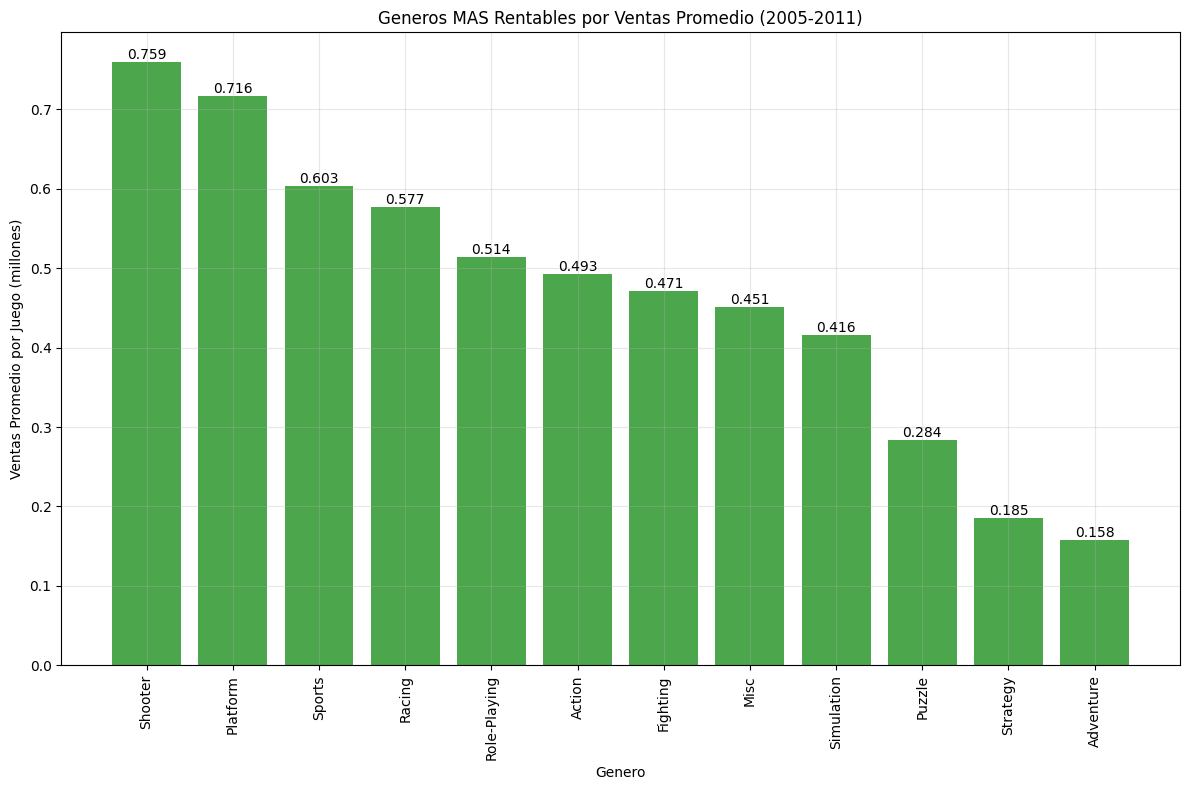

In [53]:
#Para responder a las preguntas de rentabilidad de los juegos, debemos conocer su analisis estadistico 
print(total_sales_by_gender_ordered.describe())
print()

#Visualizar los generos mas rentables 
genre_by_avg_sales = total_sales_by_gender_ordered.sort_values('ventas_promedio', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(genre_by_avg_sales.index, genre_by_avg_sales['ventas_promedio'], color='green', alpha=0.7)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, format(height, '.3f'), ha='center', va='bottom', fontsize=10)

plt.title('Generos MAS Rentables por Ventas Promedio (2005-2011)')
plt.xlabel('Genero')
plt.ylabel('Ventas Promedio por Juego (millones)')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [54]:
#¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

# Podemos usar los cuartiles para categorizar el genero menos rentable:
q1 = total_sales_by_gender_ordered['ventas_promedio'].quantile(0.25)  # valor del 25% 0.382853

# Podemos usar los cuartiles para categorizar el genero mas rentable:
q3 = total_sales_by_gender_ordered['ventas_promedio'].quantile(0.75)  # valor del 75% 0.583138

# Categorizar los videojuegos or rentabilidad
def categorize_genre(avg_sales):
    if avg_sales >= q3:
        return 'Alta Rentabilidad'
    elif avg_sales >= q1:
        return 'Rentabilidad Media'
    else:
        return 'Baja Rentabilidad'

total_sales_by_gender_ordered['categoria'] = total_sales_by_gender_ordered['ventas_promedio'].apply(categorize_genre)

display(total_sales_by_gender_ordered)

,cantidad_juegos,ventas_totales,ventas_promedio,categoria
Action,1543,760.92,0.493143,Rentabilidad Media
Misc,1176,530.79,0.451352,Rentabilidad Media
Sports,1115,672.27,0.602933,Alta Rentabilidad
Adventure,763,120.38,0.157772,Baja Rentabilidad
Role-Playing,697,357.98,0.513601,Rentabilidad Media
Shooter,598,453.83,0.758913,Alta Rentabilidad
Simulation,564,234.50,0.415780,Rentabilidad Media
Racing,523,301.53,0.576539,Rentabilidad Media
Puzzle,371,105.39,0.284070,Baja Rentabilidad
Strategy,351,65.08,0.185413,Baja Rentabilidad


In [55]:
# Calcular la correlacion entre cantidad de juegos y ventas promedio
correlacion_cantidad_promedio = total_sales_by_gender_ordered['cantidad_juegos'].corr(total_sales_by_gender_ordered['ventas_promedio'])

print(f"Correlación entre cantidad de juegos y ventas promedio:\n {correlacion_cantidad_promedio}")
print()

cantidad_media = total_sales_by_gender_ordered['cantidad_juegos'].median()
ventas_promedio_media = total_sales_by_gender_ordered['ventas_promedio'].median()

print(f"Cantidad media de juegos:\n {cantidad_media}")
print()
print(f"Ventas promedio media:\n {ventas_promedio_media}")

Correlación entre cantidad de juegos y ventas promedio:
 0.09414921475065231

Cantidad media de juegos:
 581.0

Ventas promedio media:
 0.48227766561266594


## Analisis preliminar basado en los resultados anteriores:

### Generos mas populares por cantidad:
* Action (1543 juegos)
* Misc (1176 juegos) 
* Sports (1115 juegos)

### Generos mas rentables por ventas:
* Action (760.92 millones)
* Sports (672.27 millones)
* Misc (530.79 millones)

* Tras generar los gráficos de dispersion y obtener las estadisticas descriptivas, se identifico lo siguiente: 
    * Los generos Platform tienen menor cantidad de juegos pero alta rentabilidad promedio por juego 
    * Los generos Action, siendo los mas numerosos en cuanto a cantidad, muestran rentabilidad promedio media por juego individual

* Se obtuvo una correlacion debil entre:
    * La correlacion entre cantidad de juegos y ventas promedio es muy débil (0.09414) Esto indica que el volumen de producción no determina las ventas de los productos.

* Conclusiones:
    * Los generos de alta producción (Action, Misc, Sports) garantizan mercado pero con rentabilidad media (es variable)
    * Los generos especializados (Platform) pueden ofrecer mayor rentabilidad por juego, aunque con menor volumen de mercado

### Paso 4. Crea un perfil de usuario para cada región

* Para cada región (NA, UE, JP) determina:
    * Las cinco plataformas principales:
        * Describe las variaciones en sus cuotas de mercado de una región a otra.
    * Los cinco géneros principales:
        * Explica la diferencia
    * Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

'Top 5 plataformas en Norteamerica (2005-2011):\n'

platform
Wii     469.42
X360    455.69
DS      367.39
PS3     286.75
PS2     200.49
Name: na_sales, dtype: float64

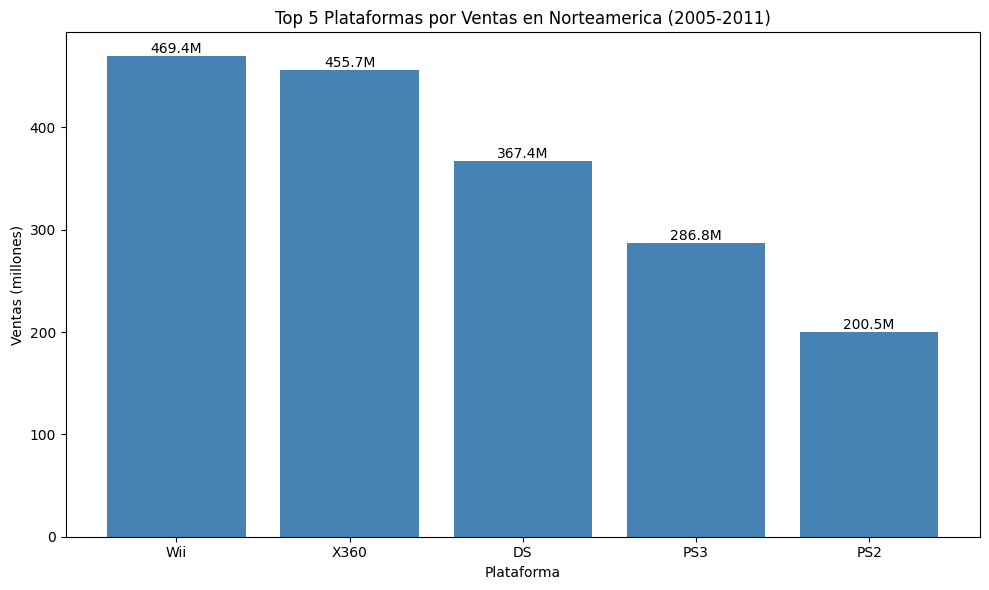

'Top 5 generos en Norteamerica (2005-2011):\n'

genre
Action          402.20
Sports          351.17
Misc            273.63
Shooter         256.19
Role-Playing    147.85
Name: na_sales, dtype: float64

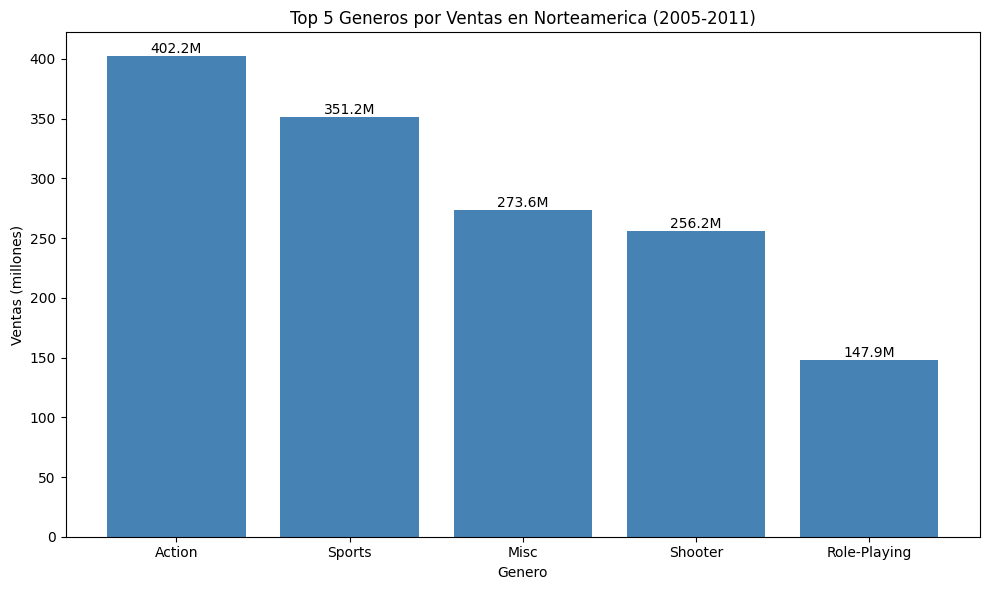


Ventas por clasificacion ESRB en Norteamerica (2005-2011):
 rating
E       760.26
T       413.06
M       375.77
E10+    267.32
AO        1.26
RP        0.00
Name: na_sales, dtype: float64


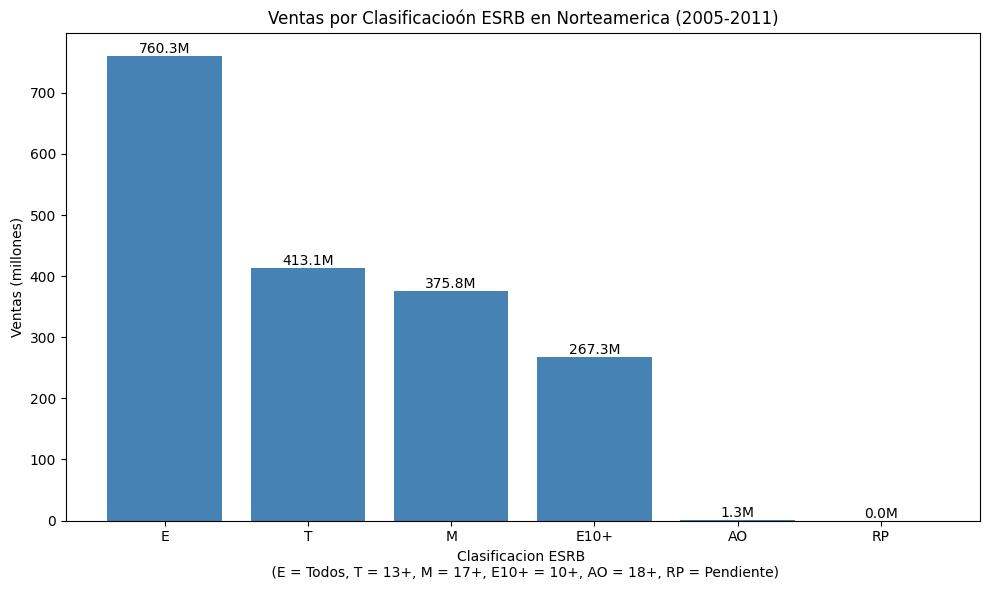

In [56]:
# Analisis Region NA 

#Top 5 plataformas:
na_platform_sales = data_2005_2011.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
display("Top 5 plataformas en Norteamerica (2005-2011):\n" , na_platform_sales.head(5))

# Creacion del grafico top 5 plataformas 
plt.figure(figsize=(10, 6))
top_5_na_platforms = na_platform_sales.head(5)
bars = plt.bar(top_5_na_platforms.index, top_5_na_platforms.values, color='steelblue')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}M', ha='center', va='bottom')

plt.title('Top 5 Plataformas por Ventas en Norteamerica (2005-2011)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.xticks()
plt.tight_layout()
plt.show()

print()

# Analisis Top 5 generos
na_genre_sales = data_2005_2011.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
display("Top 5 generos en Norteamerica (2005-2011):\n" , na_genre_sales.head(5))

# Creacion del grafico top 5 generos para Norteamerica 
plt.figure(figsize=(10, 6))
top_5_na_genres = na_genre_sales.head(5)
bars = plt.bar(top_5_na_genres.index, top_5_na_genres.values, color='steelblue')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,f'{height:.1f}M', ha='center', va='bottom')

plt.title('Top 5 Generos por Ventas en Norteamerica (2005-2011)')
plt.xlabel('Genero')
plt.ylabel('Ventas (millones)')
plt.xticks()
plt.tight_layout()
plt.show()
print()

# Analisis clasificaciones ESRB 
na_rating_sales = data_2005_2011.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print("Ventas por clasificacion ESRB en Norteamerica (2005-2011):\n", na_rating_sales)

# Creacion del grafico de clasificacion ESRB
plt.figure(figsize=(10, 6))
bars = plt.bar(na_rating_sales.index, na_rating_sales.values, color='steelblue')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}M', ha='center', va='bottom')

plt.title('Ventas por Clasificacioón ESRB en Norteamerica (2005-2011)')
plt.xlabel('Clasificacion ESRB \n (E = Todos, T = 13+, M = 17+, E10+ = 10+, AO = 18+, RP = Pendiente)')
plt.ylabel('Ventas (millones)')
plt.xticks()
plt.tight_layout()
plt.show()

'Top 5 plataformas en Europa (2005-2011):\n'

platform
Wii     246.40
PS3     220.35
X360    193.80
DS      180.95
PS2      87.14
Name: eu_sales, dtype: float64

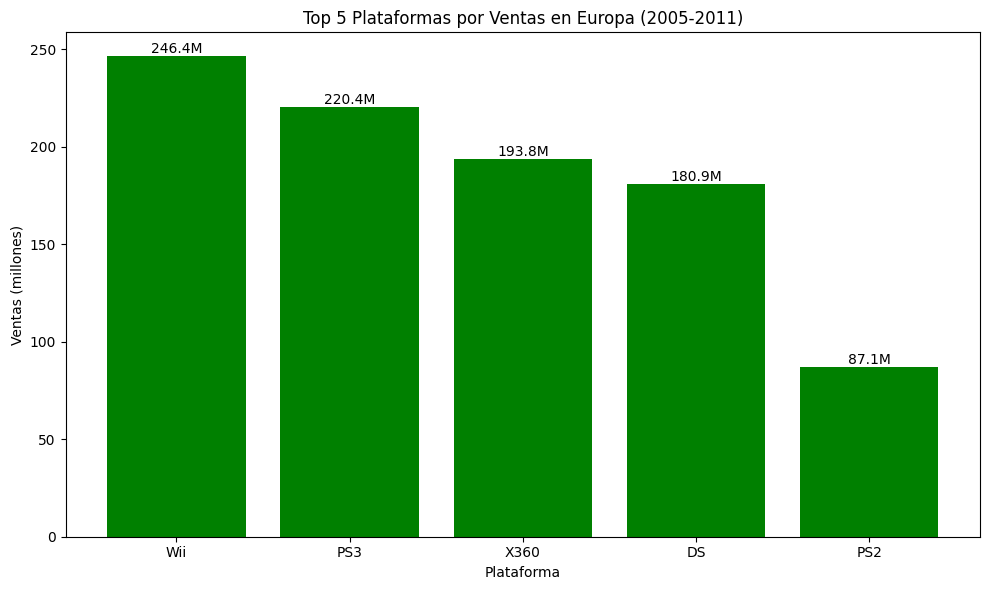

'Top 5 generos en Europa (2005-2011):\n'

genre
Action     213.24
Sports     196.52
Misc       140.77
Shooter    134.60
Racing     101.76
Name: eu_sales, dtype: float64

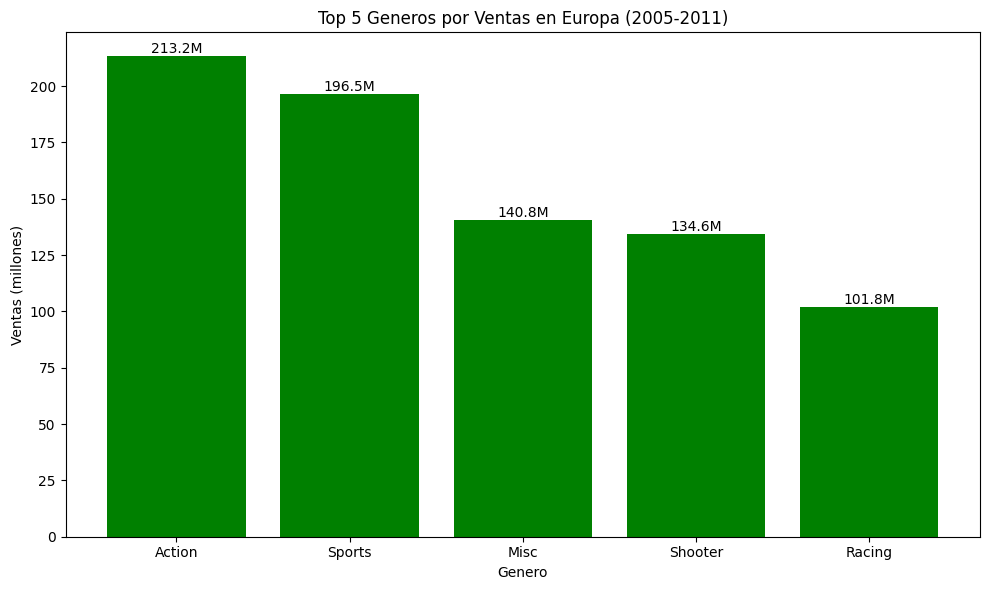


Ventas por clasificacion ESRB en Europa (2005-2011):
 rating
E       395.79
M       220.15
T       205.21
E10+    126.55
AO        0.61
RP        0.03
Name: eu_sales, dtype: float64


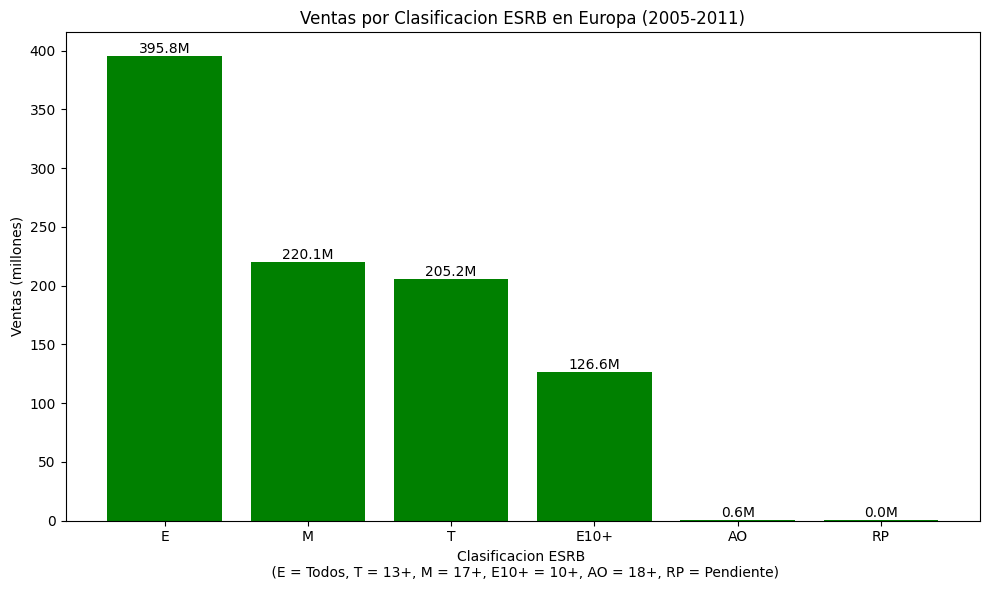

In [57]:
# Analisis Region EU

#Top 5 plataformas:
eu_platform_sales = data_2005_2011.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
display("Top 5 plataformas en Europa (2005-2011):\n" , eu_platform_sales.head(5))

# Creacion del grafico top 5 plataformas 
plt.figure(figsize=(10, 6))
top_5_eu_platforms = eu_platform_sales.head(5)
bars = plt.bar(top_5_eu_platforms.index, top_5_eu_platforms.values, color='green')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}M', ha='center', va='bottom')

plt.title('Top 5 Plataformas por Ventas en Europa (2005-2011)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.xticks()
plt.tight_layout()
plt.show()

print()

# Analisis Top 5 generos
eu_genre_sales = data_2005_2011.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
display("Top 5 generos en Europa (2005-2011):\n" , eu_genre_sales.head(5))

# Creacion del grafico top 5 generos para Norteamerica 
plt.figure(figsize=(10, 6))
top_5_eu_genres = eu_genre_sales.head(5)
bars = plt.bar(top_5_eu_genres.index, top_5_eu_genres.values, color='green')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,f'{height:.1f}M', ha='center', va='bottom')

plt.title('Top 5 Generos por Ventas en Europa (2005-2011)')
plt.xlabel('Genero')
plt.ylabel('Ventas (millones)')
plt.xticks()
plt.tight_layout()
plt.show()
print()

# Analisis clasificaciones ESRB 
eu_rating_sales = data_2005_2011.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print("Ventas por clasificacion ESRB en Europa (2005-2011):\n", eu_rating_sales)

# Creacion del grafico de clasificacion ESRB
plt.figure(figsize=(10, 6))
bars = plt.bar(eu_rating_sales.index, eu_rating_sales.values, color='green')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}M', ha='center', va='bottom')

plt.title('Ventas por Clasificacion ESRB en Europa (2005-2011)')
plt.xlabel('Clasificacion ESRB \n (E = Todos, T = 13+, M = 17+, E10+ = 10+, AO = 18+, RP = Pendiente)')
plt.ylabel('Ventas (millones)')
plt.xticks()
plt.tight_layout()
plt.show()

'Top 5 plataformas en Japon (2005-2011):\n'

platform
DS     167.63
Wii     64.89
PSP     63.38
PS2     50.98
PS3     44.12
Name: jp_sales, dtype: float64

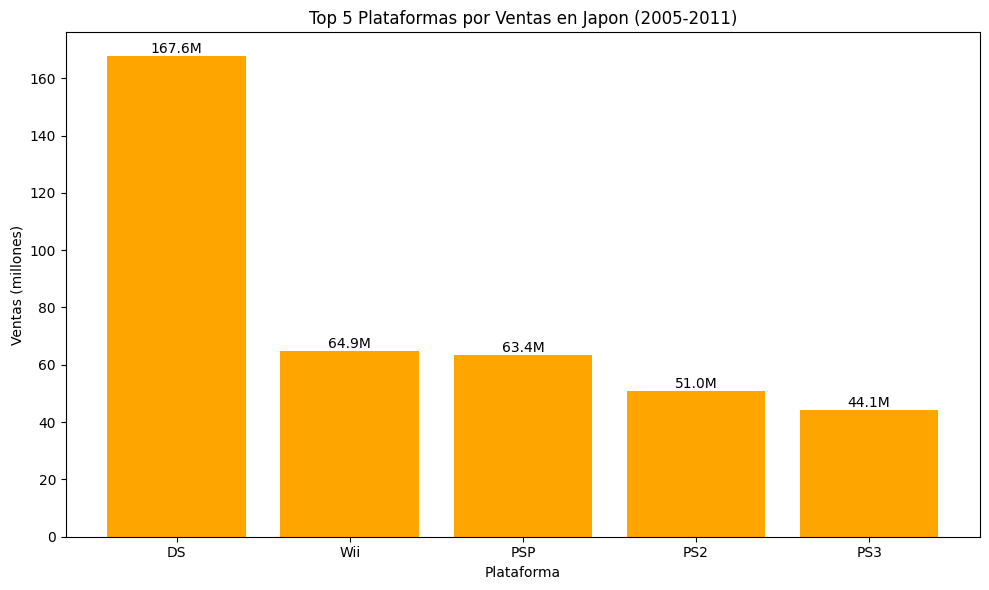

'Top 5 generos en Europa (2005-2011):\n'

genre
Role-Playing    114.16
Misc             59.63
Action           55.59
Sports           44.50
Platform         27.69
Name: jp_sales, dtype: float64

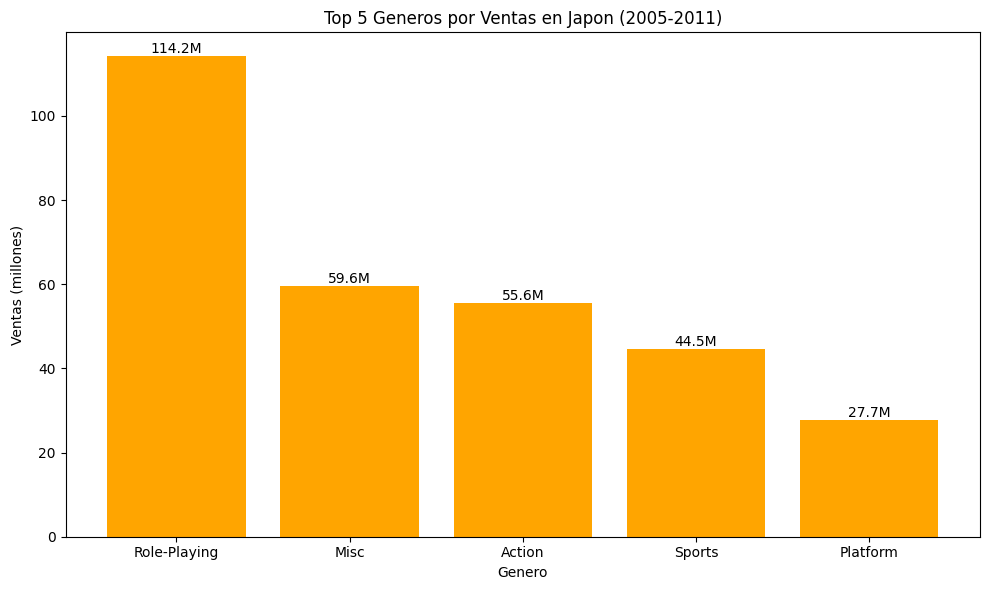


Ventas por clasificacion ESRB en Japon (2005-2011):
 rating
E       119.00
T        65.30
E10+     30.86
M        25.03
AO        0.00
RP        0.00
Name: jp_sales, dtype: float64


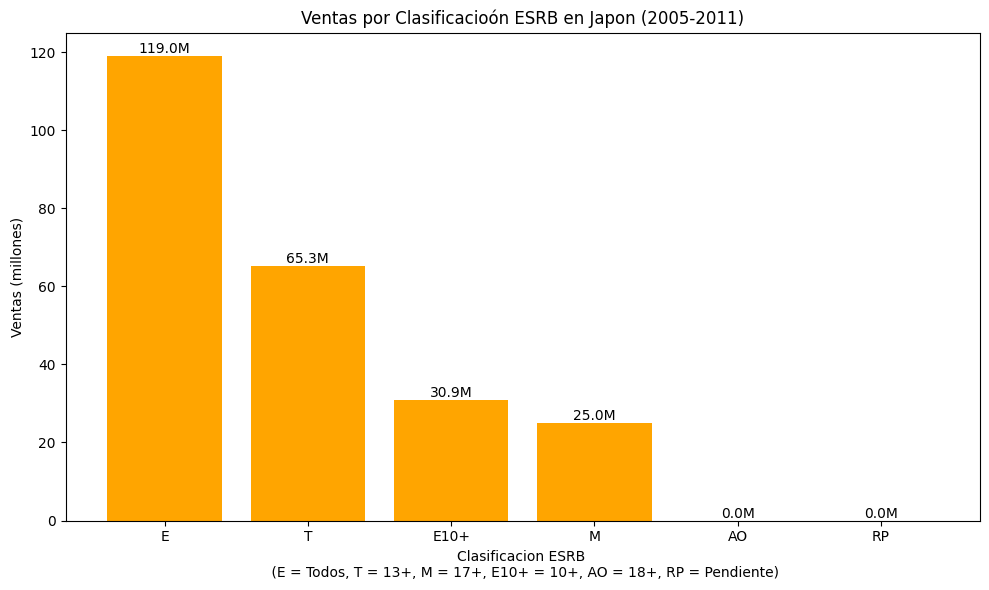

In [58]:
# Analisis Region JP

#Top 5 plataformas:
jp_platform_sales = data_2005_2011.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
display("Top 5 plataformas en Japon (2005-2011):\n" , jp_platform_sales.head(5))

# Creacion del grafico top 5 plataformas 
plt.figure(figsize=(10, 6))
top_5_jp_platforms = jp_platform_sales.head(5)
bars = plt.bar(top_5_jp_platforms.index, top_5_jp_platforms.values, color='orange')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}M', ha='center', va='bottom')

plt.title('Top 5 Plataformas por Ventas en Japon (2005-2011)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.xticks()
plt.tight_layout()
plt.show()

print()

# Analisis Top 5 generos
jp_genre_sales = data_2005_2011.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
display("Top 5 generos en Europa (2005-2011):\n" , jp_genre_sales.head(5))

# Creacion del grafico top 5 generos para Norteamerica 
plt.figure(figsize=(10, 6))
top_5_jp_genres = jp_genre_sales.head(5)
bars = plt.bar(top_5_jp_genres.index, top_5_jp_genres.values, color='orange')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,f'{height:.1f}M', ha='center', va='bottom')

plt.title('Top 5 Generos por Ventas en Japon (2005-2011)')
plt.xlabel('Genero')
plt.ylabel('Ventas (millones)')
plt.xticks()
plt.tight_layout()
plt.show()
print()

# Analisis clasificaciones ESRB 
jp_rating_sales = data_2005_2011.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print("Ventas por clasificacion ESRB en Japon (2005-2011):\n", jp_rating_sales)

# Creacion del grafico de clasificacion ESRB
plt.figure(figsize=(10, 6))
bars = plt.bar(jp_rating_sales.index, jp_rating_sales.values, color='orange')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}M', ha='center', va='bottom')

plt.title('Ventas por Clasificacioón ESRB en Japon (2005-2011)')
plt.xlabel('Clasificacion ESRB \n (E = Todos, T = 13+, M = 17+, E10+ = 10+, AO = 18+, RP = Pendiente)')
plt.ylabel('Ventas (millones)')
plt.xticks()
plt.tight_layout()
plt.show()

In [59]:
# Crear tabla pivote para plataformas por region
platforms_comparison = pd.DataFrame({
    'NA_sales': data_2005_2011.groupby('platform')['na_sales'].sum(),
    'EU_sales': data_2005_2011.groupby('platform')['eu_sales'].sum(), 
    'JP_sales': data_2005_2011.groupby('platform')['jp_sales'].sum()
}).fillna(0)

# Ordenar por ventas totales
platforms_comparison['Total'] = platforms_comparison.sum(axis=1)
platforms_comparison = platforms_comparison.sort_values('Total', ascending=False)

display("Top 10 Plataformas por Region:" ,platforms_comparison.head(10))
print()
print(platforms_comparison.describe())
print()
print()
#Crear tabla pivote para genero por region
genres_comparison = pd.DataFrame({
    'NA_sales': data_2005_2011.groupby('genre')['na_sales'].sum(),
    'EU_sales': data_2005_2011.groupby('genre')['eu_sales'].sum(),
    'JP_sales': data_2005_2011.groupby('genre')['jp_sales'].sum()
}).fillna(0)

genres_comparison['Total'] = genres_comparison.sum(axis=1)
genres_comparison = genres_comparison.sort_values('Total', ascending=False)

display("Generos por Region:" ,genres_comparison)
print()
print(genres_comparison.describe())
print()
print()
#Crear tabla pivote para ESRB POR REGION
ESRB_comparison = pd.DataFrame({
    'NA_sales': data_2005_2011.groupby('rating')['na_sales'].sum(),
    'EU_sales': data_2005_2011.groupby('rating')['eu_sales'].sum(),
    'JP_sales': data_2005_2011.groupby('rating')['jp_sales'].sum()
}).fillna(0)

ESRB_comparison['Total'] = ESRB_comparison.sum(axis=1)
ESRB_comparison = ESRB_comparison.sort_values('Total', ascending=False)

display("ESRB por Region:" ,ESRB_comparison)
print()
print(ESRB_comparison.describe())

'Top 10 Plataformas por Region:'

,NA_sales,EU_sales,JP_sales,Total
platform,,,,
Wii,469.42,246.40,64.89,780.71
DS,367.39,180.95,167.63,715.97
X360,455.69,193.80,10.73,660.22
PS3,286.75,220.35,44.12,551.22
PS2,200.49,87.14,50.98,338.61
PSP,104.89,63.50,63.38,231.77
PC,26.72,65.25,0.00,91.97
3DS,27.34,18.63,12.83,58.80
XB,42.85,14.90,0.02,57.77



         NA_sales    EU_sales    JP_sales       Total
count   13.000000   13.000000   13.000000   13.000000
mean   156.757692   85.406923   32.538462  274.703077
std    178.363392   91.904304   47.801919  298.287470
min      0.000000    0.000000    0.000000    0.060000
25%     26.850000   10.190000    0.800000   41.820000
50%     42.850000   63.500000   10.730000   91.970000
75%    286.750000  180.950000   50.980000  551.220000
max    469.420000  246.400000  167.630000  780.710000




'Generos por Region:'

,NA_sales,EU_sales,JP_sales,Total
genre,,,,
Action,402.20,213.24,55.59,671.03
Sports,351.17,196.52,44.50,592.19
Misc,273.63,140.77,59.63,474.03
Shooter,256.19,134.60,11.44,402.23
Role-Playing,147.85,66.99,114.16,329.00
Racing,146.36,101.76,15.07,263.19
Platform,124.37,65.52,27.69,217.58
Simulation,118.98,71.47,21.92,212.37
Fighting,84.84,36.30,22.24,143.38



         NA_sales    EU_sales    JP_sales       Total
count   12.000000   12.000000   12.000000   12.000000
mean   169.820833   92.524167   35.250000  297.595000
std    122.829042   65.536853   29.779421  200.051722
min     26.710000   20.240000   11.440000   59.180000
25%     78.042500   35.327500   16.142500  135.072500
50%    135.365000   69.230000   22.135000  240.385000
75%    260.550000  136.142500   47.272500  420.180000
max    402.200000  213.240000  114.160000  671.030000




'ESRB por Region:'

,NA_sales,EU_sales,JP_sales,Total
rating,,,,
E,760.26,395.79,119.00,1275.05
T,413.06,205.21,65.30,683.57
M,375.77,220.15,25.03,620.95
E10+,267.32,126.55,30.86,424.73
AO,1.26,0.61,0.00,1.87
RP,0.00,0.03,0.00,0.03



         NA_sales    EU_sales    JP_sales        Total
count    6.000000    6.000000    6.000000     6.000000
mean   302.945000  158.056667   40.031667   501.033333
std    286.574408  150.566070   45.582287   480.164975
min      0.000000    0.030000    0.000000     0.030000
25%     67.775000   32.095000    6.257500   107.585000
50%    321.545000  165.880000   27.945000   522.840000
75%    403.737500  216.415000   56.690000   667.915000
max    760.260000  395.790000  119.000000  1275.050000


# Paso 4 - Crea un perfil de usuario para cada región

1.Plataformas lideres:
    * Wii: Domina con 780.7M total 
        * (469.4M NA, 246.4M EU, 64.9M JP)
    * DS: Segundo lugar con 551.2M total
        * (286.8M NA, 181.0M EU, 83.4M JP)
    * X360: Tercero con 480.5M total 
        * (286.8M NA, 180.9M EU, 12.8M JP)

* Patrones Regionales:
    * Norteamerica: Domina en casi todas las plataformas
    * Europa: Sigue patrones similares a NA 
    * Japon: Mercado muy diferente 
        * DS lidera, Xbox prácticamente inexistente
    

2. Analisis del Genero por Regiones:
* Action lidera en las 3 regiones
    * (402.2M NA, 213.2M EU, 114.2M JP)
* Sports es fuerte en NA y EU, pero no tan fuerte en JP

Observaciones interesantes por Regiones: 
* Role-Playing: 
    * Japón (114.2M) vs NA (59.2M) - Japon Supera 
* Shooter: 
    * NA (213.2M) vs JP (11.4M) - una diferencia cultural muy grande, comparado con un pais que es fanatico a las armas (NA)
* Misc: 
    * Fuerte en todas las regiones pero especialmente en NA

3. CLASIFICACIONES ESRB
* "E" (Everyone) domina en las 3 regiones.
    * En todas lss regiones se observa que tienen un gusto en cuando a los ESRB parecidos para todas las regiones

Diferencias entre regiones:
* NA: Mayor tolerancia a "M" (375.8M)
* EU: Balance entre "M" y "T"
* JP: Preferencia clara por contenido familiar ("E" = 119.0M)

Para el Modelo 2017:

* Plataformas Seguras:
    * Wii y DS han demostrado exito global
* Generos Universales: 
    * Action funciona en todas las regiones
* Adaptacion Regional:
    * NA/EU: Shooters y contenido maduro
    * JP: RPGs y contenido familiar
    * Clasificación mas comprada/usda: "E" garantiza mercado global

* Como pregunta estrategica , que tipo de juego se podria desarrollar para tener exito global en 2017?
    * Creo que podriamos ocupar un juego para consola wii que sea de genero Acccion y se le asigne un Rating E. 

* El wii se ha mantenido como lider de ventas con 780.7M de ventas globales, con base en los datos anteriores, ha tenido exito en las 3 regiones y presenta "valores atipicos" que funcionaron como Top en ventas para algunos juegos. 

* El genero de Accion es el que mas funciona en todas las regiones y lider en ventas, considerando que se debe tener un Rating tipo E, dado que si se quiere vender en todos las regiones incluyendo a Japon, lo que ayudaria a tener mejores ventas del juego. 

# Paso 5. Prueba las siguientes hipótesis:

    * Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
        * Hipotesis Nula (H0): XboxOne = PC  
            * (Las calificaciones promedio de usuarios son iguales)
        * Hipotesis Alternativa (H1): XboxOne ≠ PC  
            (* Las calificaciones promedio de usuarios son diferentes)

    * Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
        * Hipotesis Nula (H0): Action = Sports  
            * (Las calificaciones promedio de usuarios son iguales)
        * Hipotesis Alternativa (H1): Action ≠ Sports  
            * (Las calificaciones promedio de usuarios son diferentes)

    * Establece tu mismo el valor de umbral alfa.
        *0.05 (5% de significancia)


* Explica:
    * Cómo formulaste las hipótesis nula y alternativa.
    * Qué criterio utilizaste para probar las hipótesis y por qué.

In [60]:
# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#        **Hipotesis Nula (H0): XboxOne = PC  
#            (Las calificaciones promedio de usuarios son iguales)
#       **Hipotesis Alternativa (H1): XboxOne ≠ PC  
#           (Las calificaciones promedio de usuarios son diferentes)

# Verificar datos disponibles para Xbox One 
xbox_data = games[games['platform'] == 'XOne']['user_score'].dropna()
print(f"Cantidad de user_scores para Xbox One:\n {len(xbox_data)}")
print()
#Obtener calificaciones promedio 
calif_promedio_xbox = xbox_data.mean()
print("Calificacion Promedio de usuarios (user_score) Xbox:\n" , round(calif_promedio_xbox,3) )
print()
print("Estadistica Descriptiva Xbox:\n", xbox_data.describe())
print()
print("****************************************************")
print()
# Verificar datos disponibles para PC
pc_data = games[games['platform'] == 'PC']['user_score'].dropna()
print(f"Cantidad de user_scores PC: \n {len(pc_data)}")
print()
#Obtener calificaciones promedio 
calif_promedio_pc = pc_data.mean()
print("Calificacion Promedio de usuarios (user_score) PC:\n" , round(calif_promedio_pc, 3))
print()
print("Estadistica Descriptiva PC:\n", pc_data.describe())


Cantidad de user_scores para Xbox One:
 182

Calificacion Promedio de usuarios (user_score) Xbox:
 6.521

Estadistica Descriptiva Xbox:
 count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

****************************************************

Cantidad de user_scores PC: 
 770

Calificacion Promedio de usuarios (user_score) PC:
 7.062

Estadistica Descriptiva PC:
 count    770.000000
mean       7.062468
std        1.529963
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64


### Analisis de Estadistica Descriptiva para Xbox y PC

* Para Xbox : La mediana (6.80) es mayor a la media(6.521) esto sugiere que no es una distribucion normal sesgada a la izquierda. 
* Para PC : la mediana (7.50) es mayor a la media (7.06) esto sugiere que no es una distribucion normal sesgada a la izquierda.

Tamanos de muestras diferentes Xbox = 182 vs PC = 770 muestras, aunque ambas son mayores a 30 registros, se tiene que ocupar un T-test para grupo de muestras independientes de tipo ttest_ind (para muestras independientes).

In [61]:
#Calculo de varianzas
print("Varianza X-box : " , xbox_data.var())
print()
print("Varianza pc_data: " ,pc_data.var())


Varianza X-box :  1.9069968429360695

Varianza pc_data:  2.3407871413372066


In [62]:
# Prueba las hipotesis
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
#https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?utm_cid=21057859163&utm_aid=157296744657&utm_campaign=230119_1-ps-other~dsa~tofu_2-b2c_3-latam-en_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&utm_loc=9142079-&utm_mtd=-c&utm_kw=&utm_source=google&utm_medium=paid_search&utm_content=ps-other~latam-en~dsa~tofu~tutorial~python&gad_source=1&gad_campaignid=21057859163&gbraid=0AAAAADQ9WsEZedSIX5pYRZTooJ8wKf49V&gclid=Cj0KCQiAoZDJBhC0ARIsAERP-F_58IoPZD9IFvH8pvrENZfSkHpVoTmR_738DeMufOLnLhRNNWZWI8IaAsxaEALw_wcB

print("Hipotesis Nula H0:")
print("Las calificaciones promedio de usuarios son iguales para las plataformas XboxOne = PC")
print()

sample_1= xbox_data
sample_2 = pc_data
alpha = 0.05

#Si el valor P es menor que alpha, se puede rechazar la hipotesis.

#Realiza la prueba
#equal_var = If False, perform Welch’s t-test, which does not assume equal population variance.
results = st.ttest_ind(sample_1,sample_2, equal_var=False)

print(f"valor p: \n {results.pvalue}") # extraer el valor p
print()

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Hipotesis Nula H0:
Las calificaciones promedio de usuarios son iguales para las plataformas XboxOne = PC

valor p: 
 4.935072360183574e-06

Rechazamos la hipótesis nula


In [63]:
# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#        **Hipotesis Nula (H0):  Action = Sports 
#            (Las calificaciones promedio de usuarios son iguales)
#       **Hipotesis Alternativa (H1): Action ≠ Sports  
#           (Las calificaciones promedio de usuarios son diferentes)

# Verificar datos disponibles para Action 
action_data = games[games['genre'] == 'Action']['user_score'].dropna()
print(f"Cantidad de user_scores para (user_scores) Genero Action:\n {len(action_data)}")
print()
#Obtener calificaciones promedio 
calif_promedio_action = action_data.mean()
print("Calificacion Promedio de usuarios (genre) Action:\n" , round(calif_promedio_action,3) )
print()
print("Estadistica Descriptiva Xbox:\n", action_data.describe())
print()
print("****************************************************")
print()
# Verificar datos disponibles para Sports
sports_data = games[games['genre'] == 'Sports']['user_score'].dropna()
print(f"Cantidad de (user_scores) Genero Sports: \n {len(sports_data)}")
print()
#Obtener calificaciones promedio 
calif_promedio_sports = sports_data.mean()
print("Calificacion Promedio de usuarios (user_score) PC:\n" , round(calif_promedio_sports, 3))
print()
print("Estadistica Descriptiva PC:\n", sports_data.describe())

Cantidad de user_scores para (user_scores) Genero Action:
 1830

Calificacion Promedio de usuarios (genre) Action:
 7.054

Estadistica Descriptiva Xbox:
 count    1830.000000
mean        7.054044
std         1.425394
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

****************************************************

Cantidad de (user_scores) Genero Sports: 
 1103

Calificacion Promedio de usuarios (user_score) PC:
 6.961

Estadistica Descriptiva PC:
 count    1103.000000
mean        6.961197
std         1.611370
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64


### Analisis de Estadistica Descriptiva para Genero Action y Sports

* Para Action : La mediana (7.40) es mayor a la media(7.054) esto sugiere que no es una distribucion normal sesgada a la izquierda. 
* Para Sports : la mediana (7.40) es mayor a la media (6.961) esto sugiere que no es una distribucion normal sesgada a la izquierda.

Tamanos de muestras diferentes Action = 1830 vs Sports = 1103 muestras, aunque ambas son mayores a 30 registros, se tiene que ocupar un T-test para grupo de muestras independientes de tipo ttest_ind (para muestras independientes)

In [64]:
#Calculo de Varianzas: 
print("Varianza Action : " , action_data.var())
print()
print("Varianza Sports: " ,sports_data.var())

Varianza Action :  2.031746898033205

Varianza Sports:  2.5965147189730033


In [65]:
# Prueba las hipotesis
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
#https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests?utm_cid=21057859163&utm_aid=157296744657&utm_campaign=230119_1-ps-other~dsa~tofu_2-b2c_3-latam-en_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&utm_loc=9142079-&utm_mtd=-c&utm_kw=&utm_source=google&utm_medium=paid_search&utm_content=ps-other~latam-en~dsa~tofu~tutorial~python&gad_source=1&gad_campaignid=21057859163&gbraid=0AAAAADQ9WsEZedSIX5pYRZTooJ8wKf49V&gclid=Cj0KCQiAoZDJBhC0ARIsAERP-F_58IoPZD9IFvH8pvrENZfSkHpVoTmR_738DeMufOLnLhRNNWZWI8IaAsxaEALw_wcB

print("Hipotesis Nula H0:")
print(" Las calificaciones promedio de usuarios son iguales para los generos de Action = Sports ")
print()

sample_1= action_data
sample_2 = sports_data
alpha = 0.05

#Si el valor P es menor que alpha, se puede rechazar la hipotesis.

#Realiza la prueba
#equal_var = If False, perform Welch’s t-test, which does not assume equal population variance.
results = st.ttest_ind(sample_1,sample_2, equal_var=False)

print(f"valor p: \n {results.pvalue}") # extraer el valor p
print()

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Hipotesis Nula H0:
 Las calificaciones promedio de usuarios son iguales para los generos de Action = Sports 

valor p: 
 0.11483818791498286

No podemos rechazar la hipótesis nula


## Analisis de las hipotesis realizadas e interpretacion de los datos:
### Cómo formulaste las hipótesis nula y alternativa:
    * Primera Hipótesis (Xbox One vs PC):
        * Hipótesis Nula (H0): Las calificaciones promedio de usuarios son iguales para Xbox One y PC 
        * Hipótesis Alternativa (H1): Las calificaciones promedio de usuarios son diferentes para Xbox One y PC 

    * Segunda Hipótesis (Action vs Sports):
        * Hipótesis Nula (H0): Las calificaciones promedio de usuarios son iguales para géneros Action y Sports 
        * Hipótesis Alternativa (H1): Las calificaciones promedio de usuarios son diferentes para géneros Action y Sports 

### Qué criterio utilizaste para probar las hipótesis y por qué:

* Criterio:
    * Prueba t de Welch (ttest_ind con equal_var=False), porque:
        * Muestras independientes (diferentes plataformas y generos)
        * Varianzas desiguales:
            * Xbox: 1.91 vs PC: 2.34
            * Action: 2.03 vs Sports: 2.60
        * Tamaños de muestra diferentes pero mayores a 30
        * Nivel de significancia α = 0.05 (95% de confianza)            


### Paso 6. Conclusion general
    * Los hallazgos principales
    * Recomendaciones para la campaña 2017
    * Insights clave para el negocio

1. Hallazgos Principales del Analisis (2005-2011)
* Plataformas Lideres en el mercado :
    * Wii fue lider de ventas con 780.71M
    * DS y X360 consistente en ventas
    * PS3 fue creciendo considerablemente (una vez que PS2 dejo el mercado)

2.Generos mas vendidos:
    * Action lidera en todas las regiones (NA,EU,JP) con 760.92M total
    * Sports y Misc son los segundos titulos mas vendidos despues de Action
    * Platform tiene buenas ventas promedio por juego

3. Diferencias entre por Regiones:
    * Norteamerica: Domina en volumen, prefiere juegos tipo shooters y contenido para gente adulta.
    * Europa: Patrones similares a NA, pero muestra que tiene un gusto un poco mas variado
    * Japon: Mercado unico y diferente, prefiere juegos discretos y contenido familiar que predomina

4. Pruebas de Hipotesis
    * Resultados Estadisticos:
        * Xbox One vs PC: Diferencias significativas en calificaciones 
            * (p= 4.935072360183574e-06 < 0.05)     
            * Varianza X-box :  1.9069968429360695
            * Varianza pc_data:  2.3407871413372066
        * Action vs Sports: No hay diferencias significativas 
            * (0.11483818791498286 > 0.05)
            * Varianza Action :  2.031746898033205
            * Varianza Sports:  2.5965147189730033
            * Las reseñas de críticos tienen mayor correlacion con ventas que las de usuarios

5. Recomendaciones Estrategicas para 2017
* Para 2017, enfocar la campaña en juegos de Action y Sports para plataformas establecidas, adaptando el contenido segun las preferencias regionales identificadas.
Desarrollar un juego de género Acción para la plataforma Wii con clasificación E (Everyone).

* La Plataforma Wii - ventas globales de 780.7M, colocandose como lioder en el  mercado , ventas en las 3 regiones principales (NA, EU, JP) , la presencia de valores atiopicos que alcanzaron posiciones top en ventas

* El Genero de accion es lider en ventas globales, y es exitoso en las 3 regiones , con un rating de tipo E que p[ermite las ventas en las 3 regiones, y sobre todo posicionarse tambien en las ventas en Japon. 
